# Wine Clustering Dataset

### Try out different clustering models in the given dataset.

### Find the optimum number of clusters in each model and create the model with optimum number of clusters.

### Also learn about dB scan clustering and implement it

# Dataset:

In [72]:
import pandas as pd
wine_data = pd.read_csv('/content/Wine_clust .csv')

In [73]:
wine_data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [74]:
wine_data.tail()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560

In [75]:
# Find the shape of the dataset
wine_data.shape

(178, 13)

In [76]:
# Find the datatypes in the dataset
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

Based on this dataset, there are two data types:
1. Float
2. Integer

In [77]:
# Check the information in the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [78]:
wine_data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

After checking general dataset stats, we can confirm the dataset contain valid data:

1. Average Malic_Acid: 2.3 years

2. Average Phenols: 2.29

3. Average Flavanoids: 2.0

4. Median Non-Flavanoid Phenols: 0.36

5. Average Proline: 746.89

6. Average Alcohol: 13.0

# Data Cleaning:

In [79]:
#Looking for duplicates
print('Number of duplicate observations in the dataset:', wine_data.duplicated().sum())

Number of duplicate observations in the dataset: 0


In [80]:
# Looking for missing values
for col in wine_data.columns:
    print('{} - missing Values: {}'.format(col, wine_data[col].isnull().sum()))

Alcohol - missing Values: 0
Malic_Acid - missing Values: 0
Ash - missing Values: 0
Ash_Alcanity - missing Values: 0
Magnesium - missing Values: 0
Total_Phenols - missing Values: 0
Flavanoids - missing Values: 0
Nonflavanoid_Phenols - missing Values: 0
Proanthocyanins - missing Values: 0
Color_Intensity - missing Values: 0
Hue - missing Values: 0
OD280 - missing Values: 0
Proline - missing Values: 0


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Looking for outliers

#  visualizes outliers for a specific column (col) in the dataset using boxplot
def outlier_visualizer(col, vert=True, grid=True):
    wine_data[col].plot(kind='box', vert=vert)
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()

# identifies outliers for a specific column (col) using the Interquartile Range (IQR) method
def outlier_finder(col):
    q1 = np.percentile(wine_data[col], 25)
    q3 = np.percentile(wine_data[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'Alcohol':[], col:[]}

    for i,c in enumerate(wine_data[col]):
        if c < left_lim:
            outliers['Alcohol'].append(wine_data[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['Alcohol'].append(wine_data[col].index[i])
            outliers[col].append(c)

    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('Alcohol', inplace=True)

    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/wine_data.shape[0]*100,2)))
    return outliers_df

## Alcohol

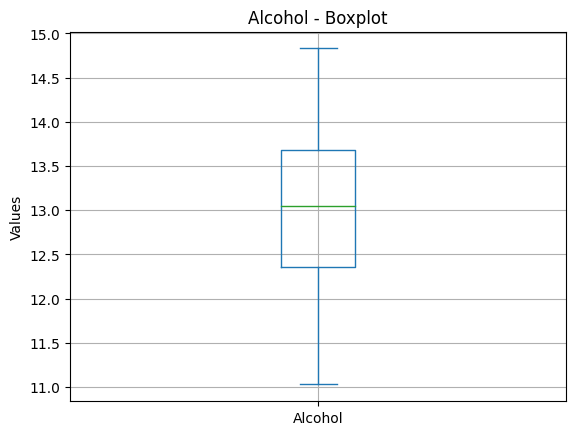

In [82]:
outlier_visualizer('Alcohol')

In [83]:
outlier_finder('Alcohol')

Alcohol - % of outliers: 0.0%


Empty DataFrame
Columns: []
Index: []

There are no datapoints defined in the outliers for 'Alcohol' column

## Malic Acid

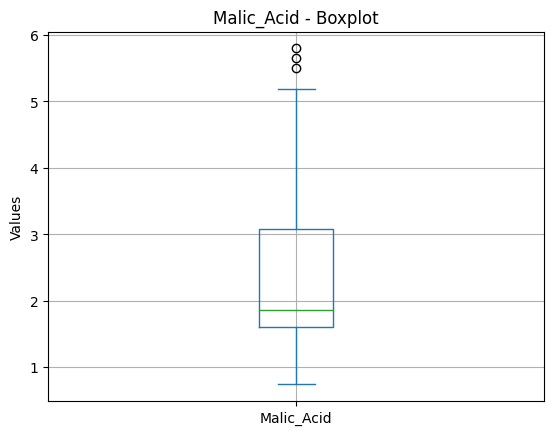

In [84]:
outlier_visualizer('Malic_Acid')

In [85]:
outlier_finder('Malic_Acid')

Malic_Acid - % of outliers: 1.69%


Malic_Acid
Alcohol            
123            5.80
137            5.51
173            5.65

The output indicates that 1.69% of the datapoints are defined as outliers.

The Malic Acid in 5.80 gives the high value of indication. This indicates that the Malic Acid have the highest rate for wine alcohol.

## Ash

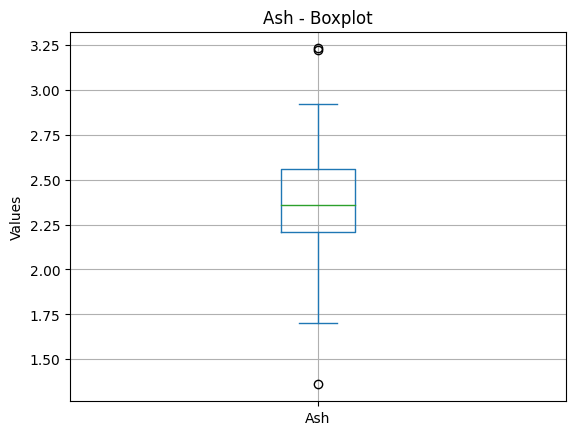

In [86]:
outlier_visualizer('Ash')

In [87]:
outlier_finder('Ash')

Ash - % of outliers: 1.69%


Ash
Alcohol      
25       3.22
59       1.36
121      3.23

Here, 1.69% of the datapoints are defined as outliers.

Each alcohol has an ash to it.

3.22 and 3.23 has a slight difference for wine alcohol

These percentages of alcohol with little amount of ash can develop into cirrhosis and hepatocellular carcinoma (HCC) if left untreated. It can also be caused by excessive alcohol drinking and chronic over-nutrition, which activates several different signaling pathways in the liver

## Ash Alcanity

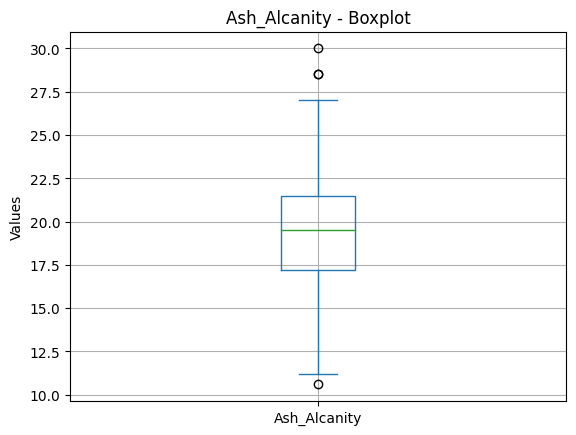

In [88]:
outlier_visualizer('Ash_Alcanity')

In [89]:
outlier_finder('Ash_Alcanity')

Ash_Alcanity - % of outliers: 2.25%


Ash_Alcanity
Alcohol              
59               10.6
73               30.0
121              28.5
127              28.5

The wine alcohol gives both an ash alcanity of 28.5.

The one with the highest rate of ash alcanity gives an excess amount of hot standardized acid solution

## Magnesium

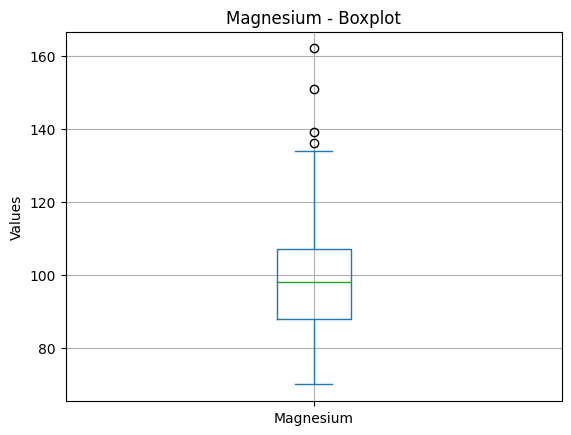

In [90]:
outlier_visualizer('Magnesium')

In [91]:
outlier_finder('Magnesium')

Magnesium - % of outliers: 2.25%


Magnesium
Alcohol           
69             151
73             139
78             136
95             162

The datapoints with 2.25% are defined as outliers.

All these corresponding values have a high rates of magnesium of an alcohol

Magnesium with depressive symptoms can be attributed to magnesium deficieny especially the ones with alcohol withdrawals.

Factors such as gastrointestinal losses with vomiting and/or diarrhea also contribute to the gradual depletion of magnesium

## Total Phenols

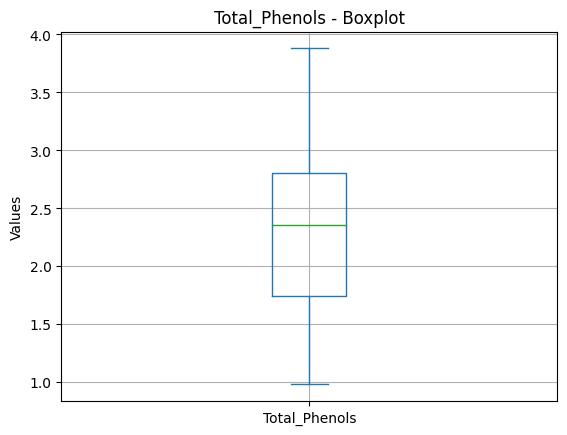

In [92]:
outlier_visualizer('Total_Phenols')

In [93]:
outlier_finder('Total_Phenols')

Total_Phenols - % of outliers: 0.0%


Empty DataFrame
Columns: [Total_Phenols]
Index: []

Here there are no datapoints defined in the outliers for total phenols.

Hence, no corresponding values present in the dataset.

## Flavanoids

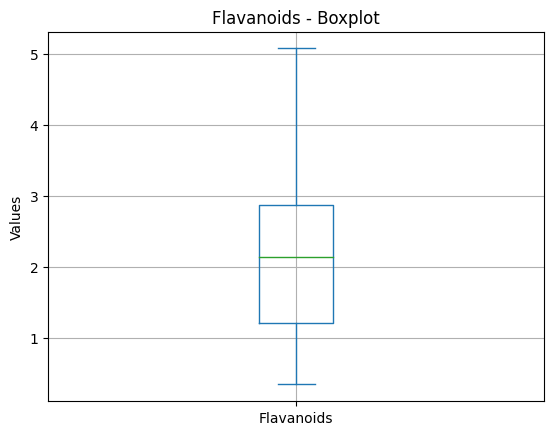

In [94]:
outlier_visualizer('Flavanoids')

In [95]:
outlier_finder('Flavanoids')

Flavanoids - % of outliers: 0.0%


Empty DataFrame
Columns: [Flavanoids]
Index: []

The 'Flavanoids' of the datapoints are not defined as outliers

Hence, no correponding values present in the dataset for the Flavanoids column

## Non Flavanoids Phenol

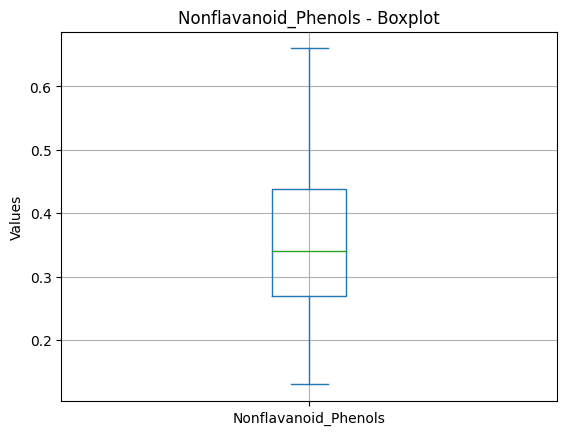

In [96]:
outlier_visualizer('Nonflavanoid_Phenols')

In [97]:
outlier_finder('Nonflavanoid_Phenols')

Nonflavanoid_Phenols - % of outliers: 0.0%


Empty DataFrame
Columns: [Nonflavanoid_Phenols]
Index: []

The 'Nonflavanoid Phenols' of the datapoints are not defined as outliers

## Proanthocyanins

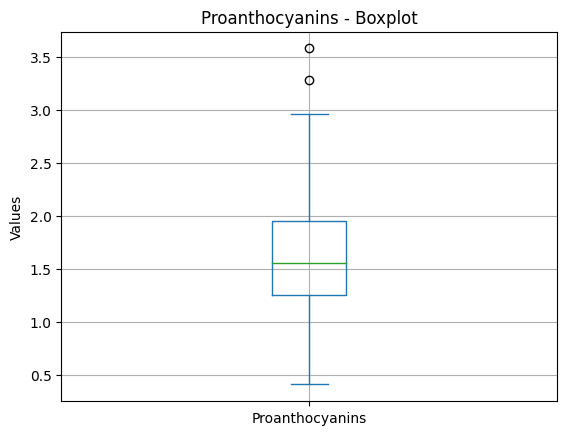

In [98]:
outlier_visualizer('Proanthocyanins')

In [99]:
outlier_finder('Proanthocyanins')

Proanthocyanins - % of outliers: 1.12%


Proanthocyanins
Alcohol                 
95                  3.28
110                 3.58

From 'Proanthocyanins' column, the two datapoints are defined as outliers:

Both have slight 0.30 difference in Proanthocyanins

This means there is a slight chance of anti-inflammatory and anti-oxidant properties that can be used to prevent the diseases.

## Color Intensity

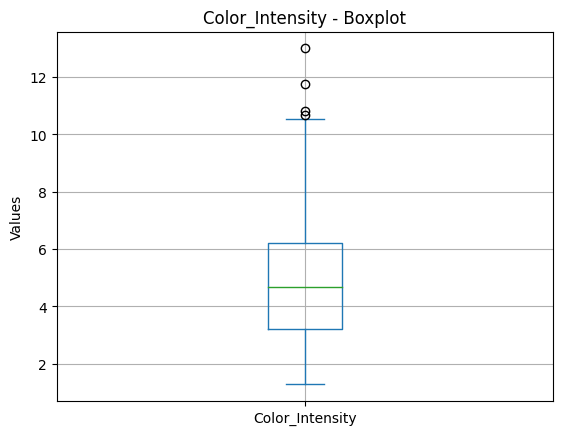

In [100]:
outlier_visualizer('Color_Intensity')

In [101]:
outlier_finder('Color_Intensity')

Color_Intensity - % of outliers: 2.25%


Color_Intensity
Alcohol                 
151                10.80
158                13.00
159                11.75
166                10.68

From this output, the four datapoints are defined as outliers with the corresponding values in the dataset.

The 'Alcohol' with 13.00 of the color intensity is the largest value compared to other values in the color intensity values.

## Hue

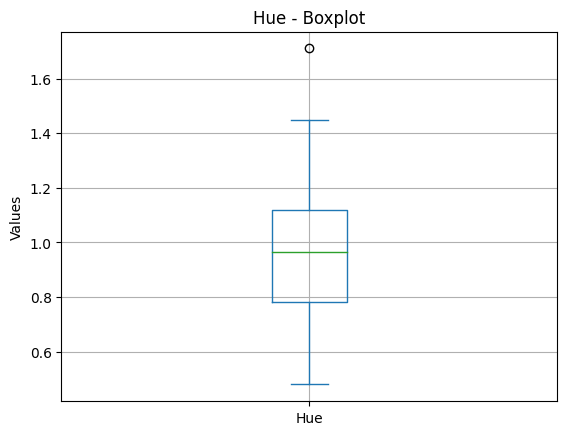

In [102]:
outlier_visualizer('Hue')

In [103]:
outlier_finder('Hue')

Hue - % of outliers: 0.56%


Hue
Alcohol      
115      1.71

An 'Alcohol'  gives 1.71 of the Hue compared to other percentages of 'Alcohol'

## OD280

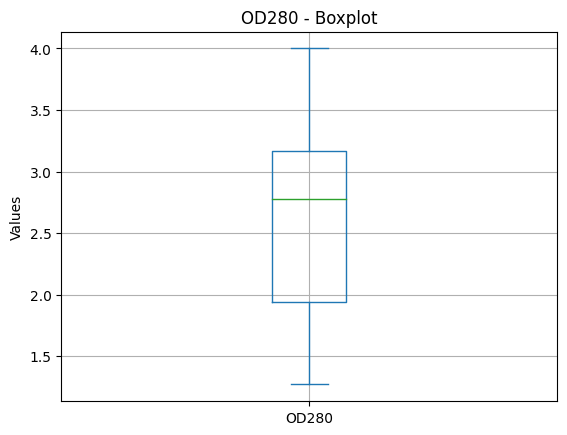

In [104]:
outlier_visualizer('OD280')

In [105]:
outlier_finder('OD280')

OD280 - % of outliers: 0.0%


Empty DataFrame
Columns: [OD280]
Index: []

There are no datapoints defined in the outliers for 'OD280' column

## Proline

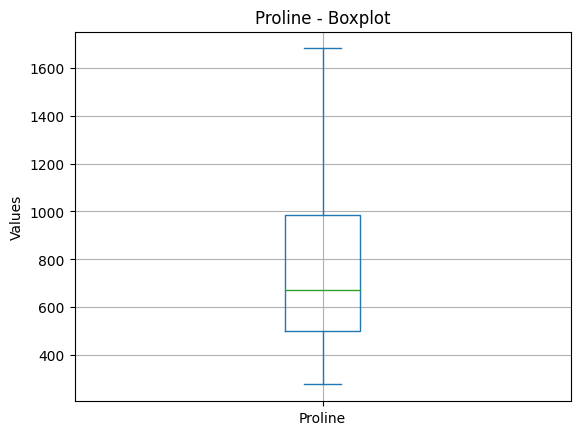

In [106]:
outlier_visualizer('Proline')

In [107]:
outlier_finder('Proline')

Proline - % of outliers: 0.0%


Empty DataFrame
Columns: [Proline]
Index: []

There are no datapoints defined in the outliers for 'Proline' column

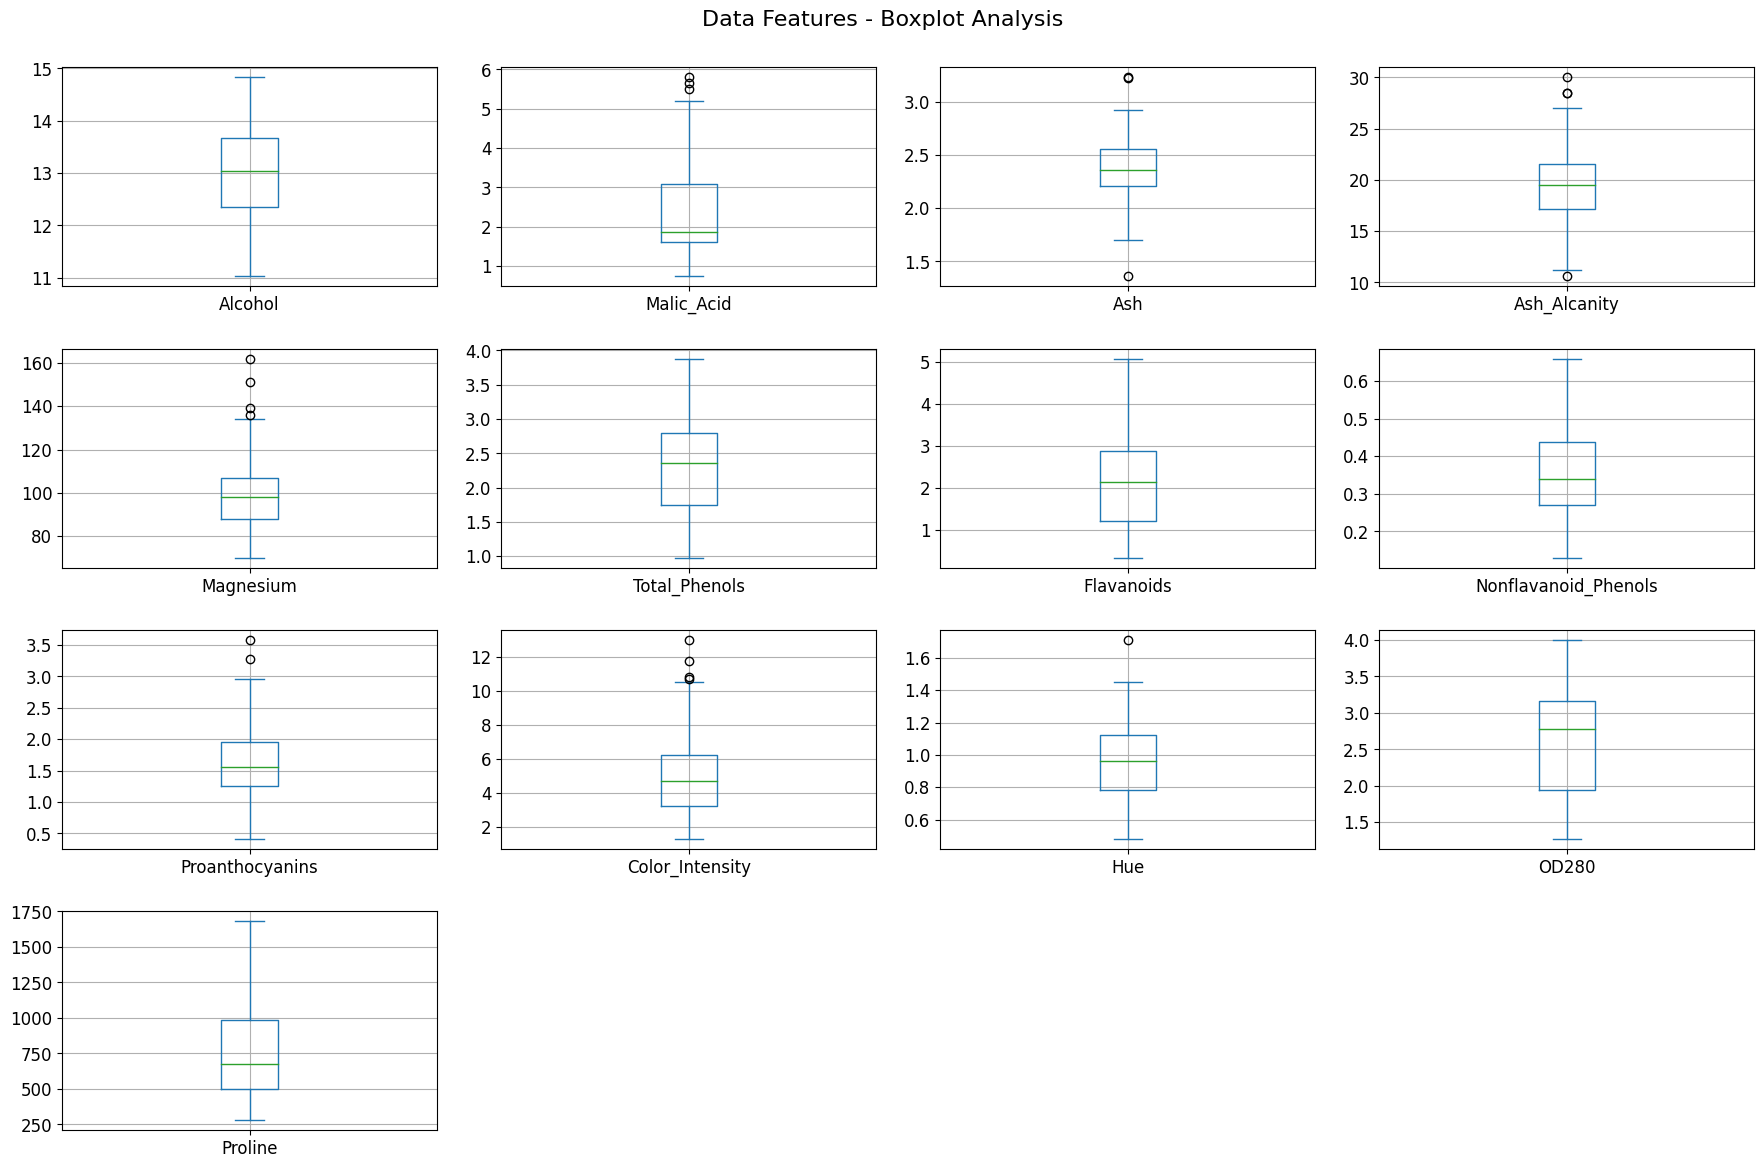

In [108]:
from urllib.request import HTTPDefaultErrorHandler
# Data Features - Boxplot Analysis

# We have 9 features so generates a 4x4 grid of subplots,
# each representing a boxplot analysis for one of the features in the dataset.

fig = plt.figure(figsize=(18,12))
Alcohol = fig.add_subplot(4,4,1)
Malic_Acid = fig.add_subplot(4,4,2)
Ash = fig.add_subplot(4,4,3)
Ash_Alcanity = fig.add_subplot(4,4,4)
Magnesium = fig.add_subplot(4,4,5)
Total_Phenols = fig.add_subplot(4,4,6)
Flavanoids = fig.add_subplot(4,4,7)
Nonflavanoid_Phenols = fig.add_subplot(4,4,8)
Proanthocyanins = fig.add_subplot(4,4,9)
Color_Intensity = fig.add_subplot(4,4,10)
Hue = fig.add_subplot(4,4,11)
OD280 = fig.add_subplot(4,4,12)
Proline = fig.add_subplot(4,4,13)

wine_data['Alcohol'].plot(kind='box', fontsize=12, ax=Alcohol)
Alcohol.grid(True)

wine_data['Malic_Acid'].plot(kind='box', fontsize=12, ax=Malic_Acid)
Malic_Acid.grid(True)

wine_data['Ash'].plot(kind='box', fontsize=12,ax=Ash)
Ash.grid(True)

wine_data['Ash_Alcanity'].plot(kind='box', fontsize=12,ax=Ash_Alcanity)
Ash_Alcanity.grid(True)

wine_data['Magnesium'].plot(kind='box', fontsize=12,ax=Magnesium)
Magnesium.grid(True)

wine_data['Total_Phenols'].plot(kind='box', fontsize=12,ax=Total_Phenols)
Total_Phenols.grid(True)

wine_data['Flavanoids'].plot(kind='box', fontsize=12,ax=Flavanoids)
Flavanoids.grid(True)

wine_data['Nonflavanoid_Phenols'].plot(kind='box', fontsize=12,ax=Nonflavanoid_Phenols)
Nonflavanoid_Phenols.grid(True)

wine_data['Proanthocyanins'].plot(kind='box', fontsize=12,ax=Proanthocyanins)
Proanthocyanins.grid(True)

wine_data['Color_Intensity'].plot(kind='box', fontsize=12,ax=Color_Intensity)
Color_Intensity.grid(True)

wine_data['Hue'].plot(kind='box', fontsize=12,ax=Hue)
Hue.grid(True)

wine_data['OD280'].plot(kind='box', fontsize=12,ax=OD280)
OD280.grid(True)

wine_data['Proline'].plot(kind='box', fontsize=12,ax=Proline)
Proline.grid(True)

fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

## Calculating Outliers

In [109]:
def IQR_OutlierRemoval(new_df):
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df
    # plt.show()

data = wine_data.copy()

print(data.shape)

(178, 13)


In [110]:
data = IQR_OutlierRemoval(data) #outlier removal
data.shape

(161, 13)

## Boxplot after Outliers

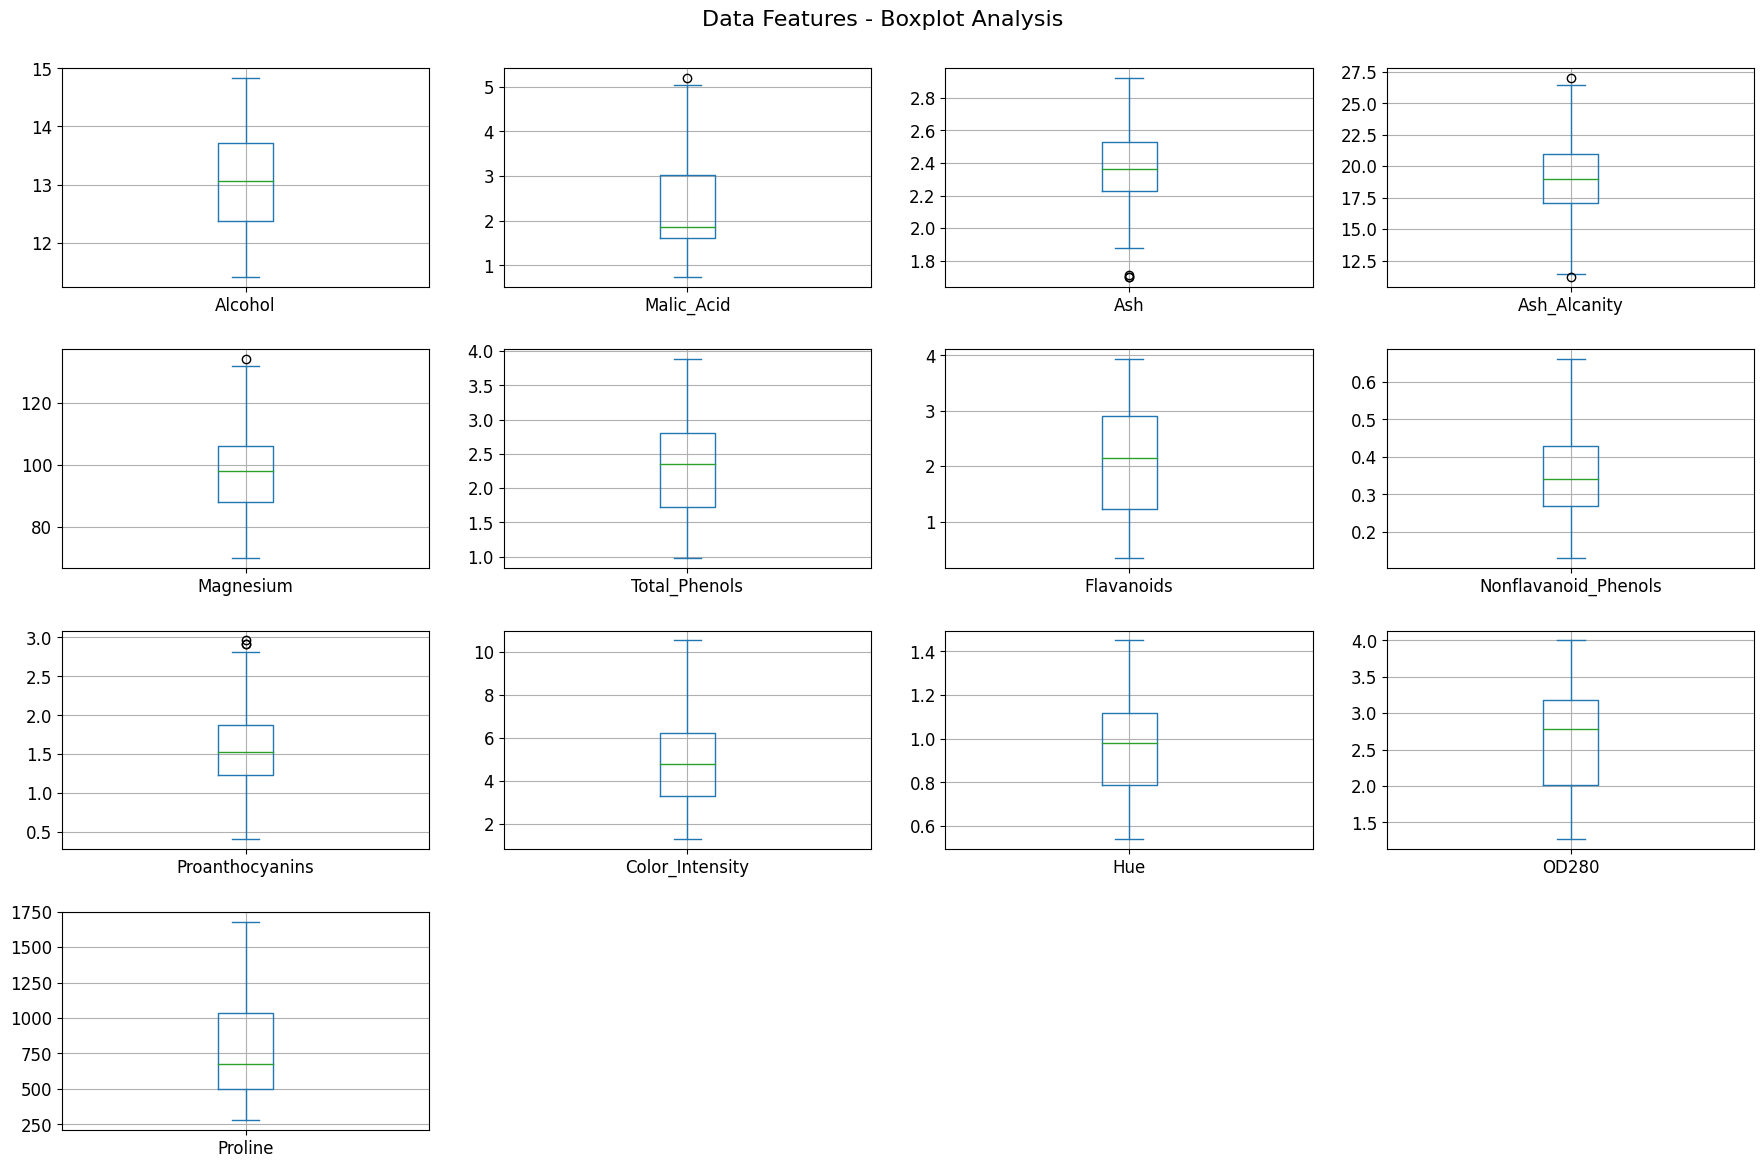

In [111]:
from urllib.request import HTTPDefaultErrorHandler
# Data Features - Boxplot Analysis

# We have 9 features so generates a 4x4 grid of subplots,
# each representing a boxplot analysis for one of the features in the dataset.

fig = plt.figure(figsize=(18,12))
Alcohol = fig.add_subplot(4,4,1)
Malic_Acid = fig.add_subplot(4,4,2)
Ash = fig.add_subplot(4,4,3)
Ash_Alcanity = fig.add_subplot(4,4,4)
Magnesium = fig.add_subplot(4,4,5)
Total_Phenols = fig.add_subplot(4,4,6)
Flavanoids = fig.add_subplot(4,4,7)
Nonflavanoid_Phenols = fig.add_subplot(4,4,8)
Proanthocyanins = fig.add_subplot(4,4,9)
Color_Intensity = fig.add_subplot(4,4,10)
Hue = fig.add_subplot(4,4,11)
OD280 = fig.add_subplot(4,4,12)
Proline = fig.add_subplot(4,4,13)

data['Alcohol'].plot(kind='box', fontsize=12, ax=Alcohol)
Alcohol.grid(True)

data['Malic_Acid'].plot(kind='box', fontsize=12, ax=Malic_Acid)
Malic_Acid.grid(True)

data['Ash'].plot(kind='box', fontsize=12,ax=Ash)
Ash.grid(True)

data['Ash_Alcanity'].plot(kind='box', fontsize=12,ax=Ash_Alcanity)
Ash_Alcanity.grid(True)

data['Magnesium'].plot(kind='box', fontsize=12,ax=Magnesium)
Magnesium.grid(True)

data['Total_Phenols'].plot(kind='box', fontsize=12,ax=Total_Phenols)
Total_Phenols.grid(True)

data['Flavanoids'].plot(kind='box', fontsize=12,ax=Flavanoids)
Flavanoids.grid(True)

data['Nonflavanoid_Phenols'].plot(kind='box', fontsize=12,ax=Nonflavanoid_Phenols)
Nonflavanoid_Phenols.grid(True)

data['Proanthocyanins'].plot(kind='box', fontsize=12,ax=Proanthocyanins)
Proanthocyanins.grid(True)

data['Color_Intensity'].plot(kind='box', fontsize=12,ax=Color_Intensity)
Color_Intensity.grid(True)

data['Hue'].plot(kind='box', fontsize=12,ax=Hue)
Hue.grid(True)

data['OD280'].plot(kind='box', fontsize=12,ax=OD280)
OD280.grid(True)

data['Proline'].plot(kind='box', fontsize=12,ax=Proline)
Proline.grid(True)

fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

# EDA

In [112]:
data.describe(include='all')

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean    13.040373    2.306832    2.363292     19.232298   98.534161   
std      0.797841    1.048263    0.241205      3.014706   12.365290   
min     11.410000    0.740000    1.700000     11.200000   70.000000   
25%     12.370000    1.610000    2.230000     17.100000   88.000000   
50%     13.070000    1.860000    2.360000     19.000000   98.000000   
75%     13.710000    3.030000    2.530000     21.000000  106.000000   
max     14.830000    5.190000    2.920000     27.000000  134.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     161.000000  161.000000            161.000000       161.000000   
mean        2.290373    2.043789              0.358137         1.548075   
std         0.632366    0.985649              0.121810         0.525859   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.720000    1.220000              0.270000         1.240000   
50%         2.350000    2.140000              0.340000         1.530000   
75%         2.800000    2.910000              0.430000         1.870000   
max         3.880000    3.930000              0.660000         2.960000   

       Color_Intensity         Hue       OD280      Proline  
count       161.000000  161.000000  161.000000   161.000000  
mean          5.014161    0.959106    2.628820   759.111801  
std           2.117379    0.218049    0.709052   323.866465  
min           1.280000    0.540000    1.270000   278.000000  
25%           3.270000    0.790000    2.010000   502.000000  
50%           4.800000    0.980000    2.780000   675.000000  
75%           6.200000    1.120000    3.180000  1035.000000  
max          10.520000    1.450000    4.000000  1680.000000

We need to normalize the data to bring all variables on the same scale

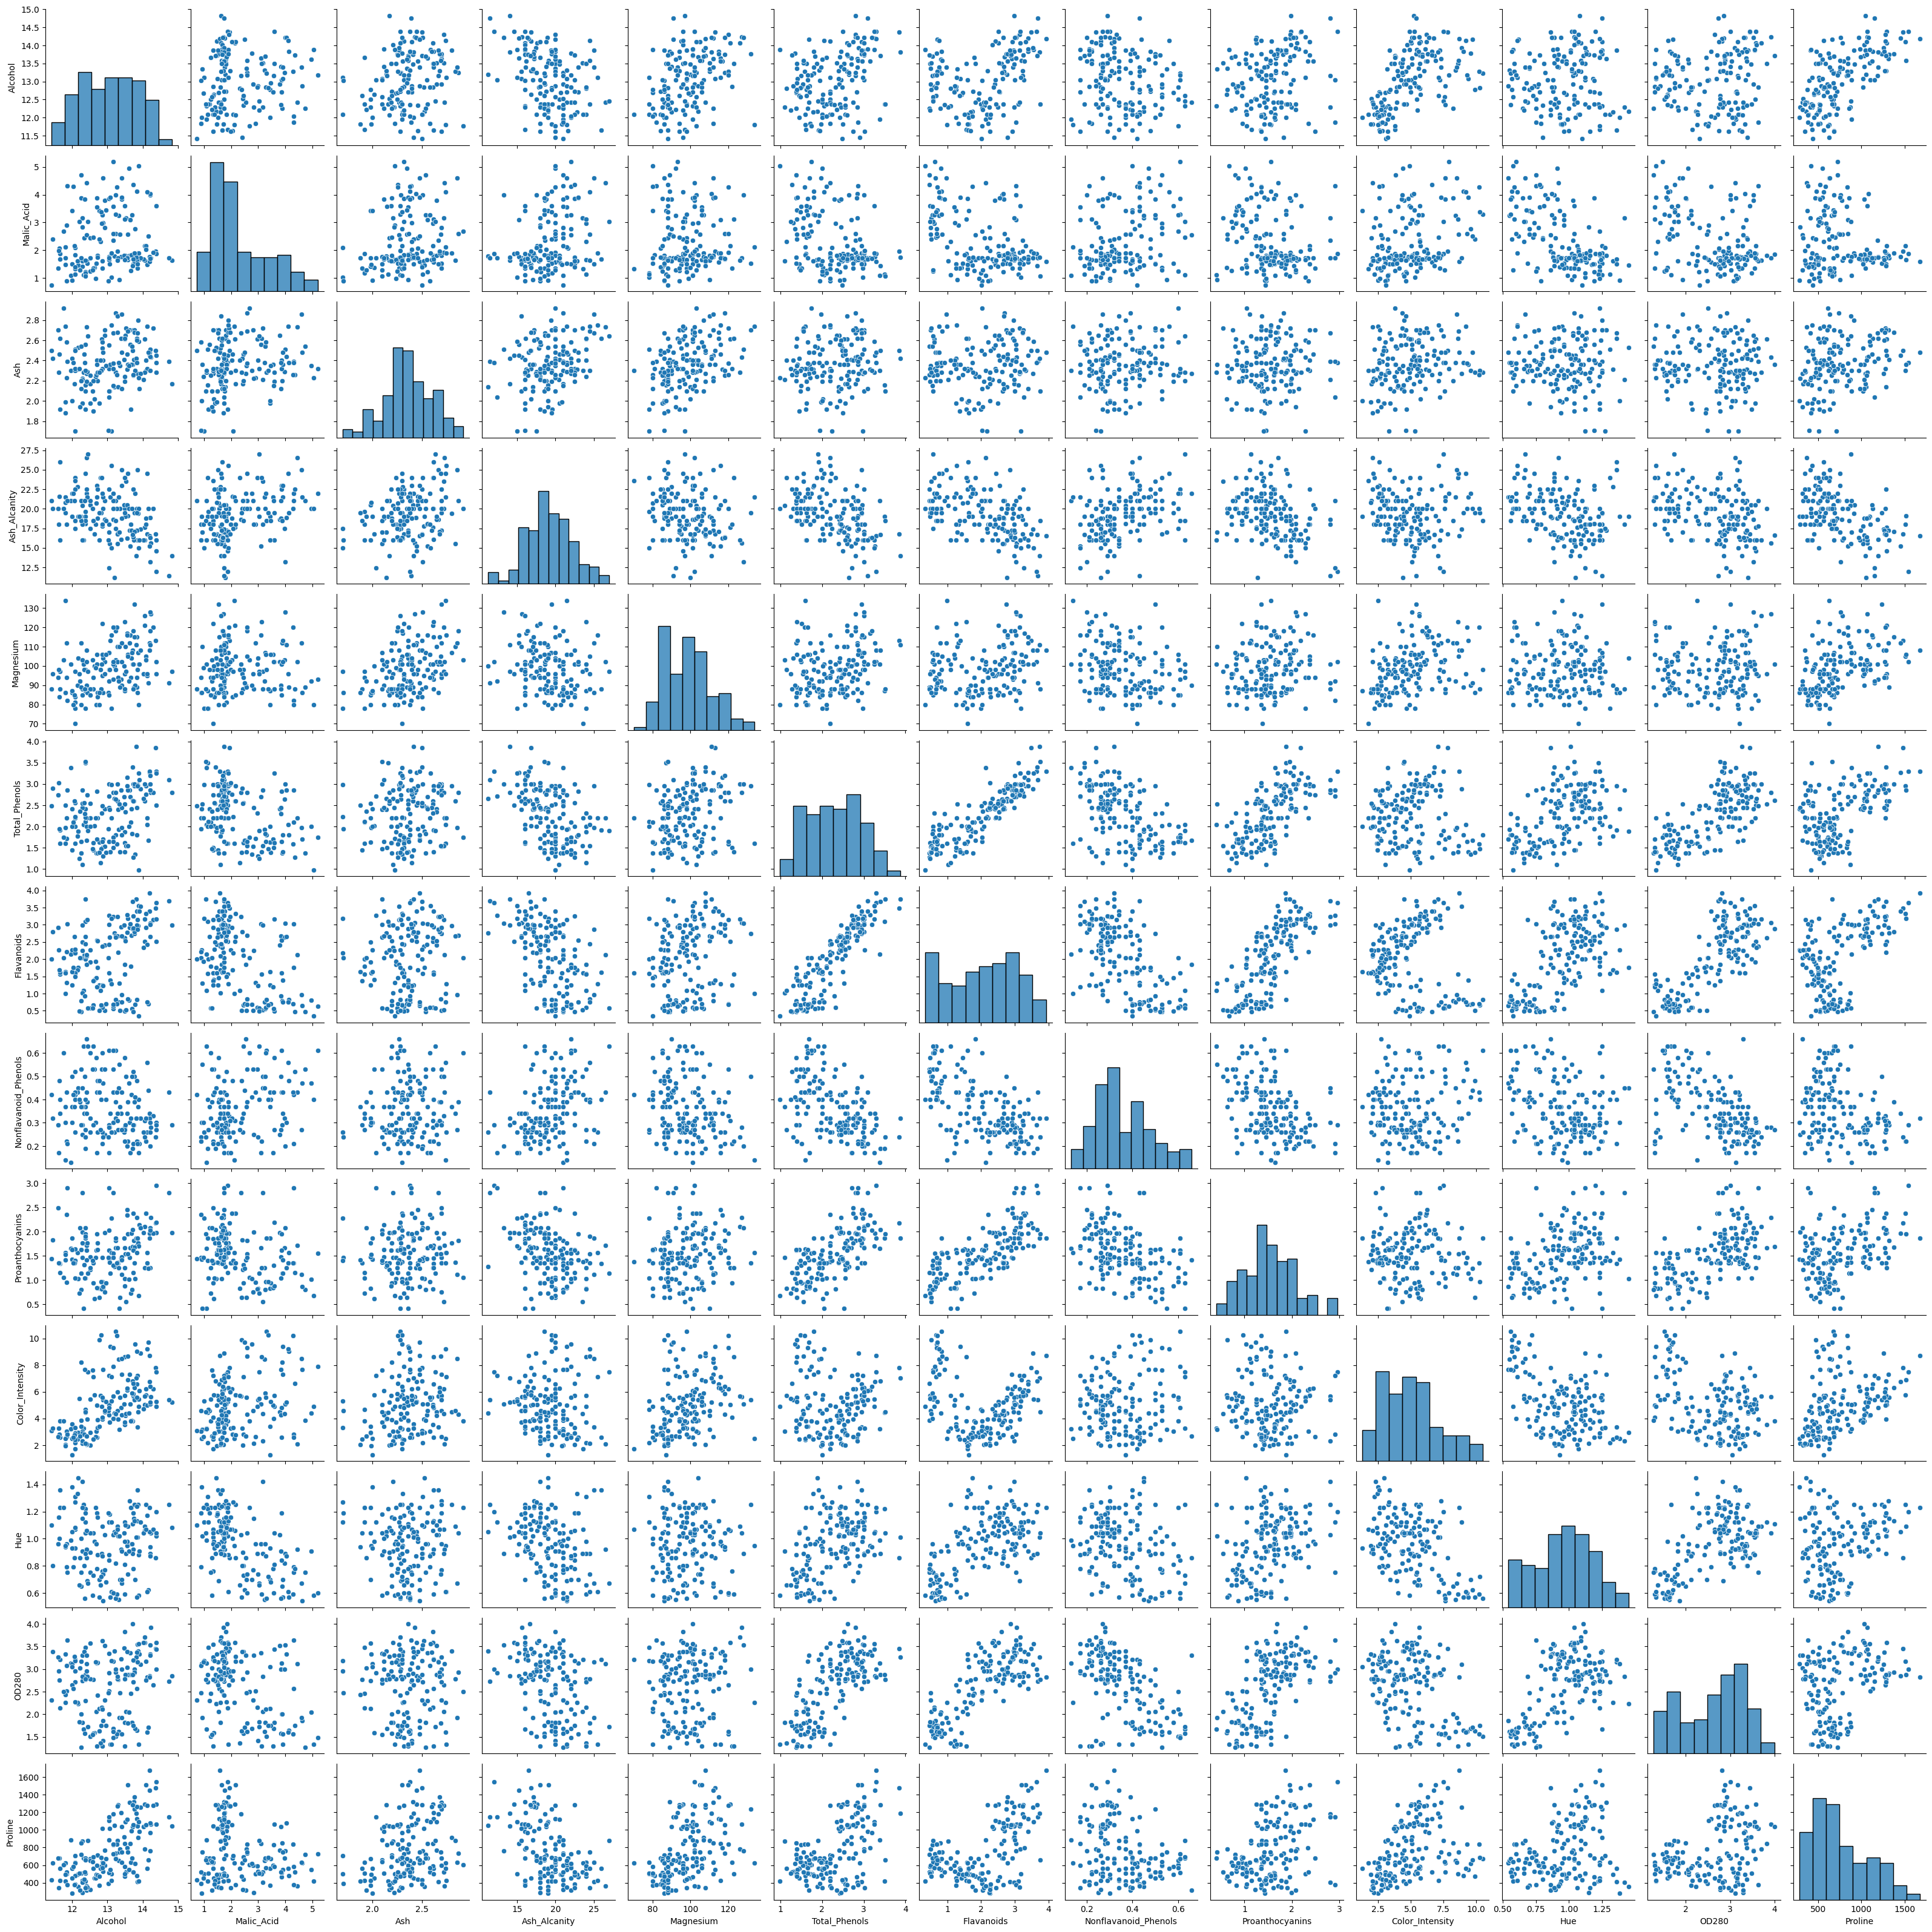

In [115]:
sns.pairplot(data)
plt.show()

In [116]:
# let's check variable skewness
data.skew()

Alcohol                -0.031847
Malic_Acid              0.893988
Ash                    -0.215661
Ash_Alcanity            0.032577
Magnesium               0.498408
Total_Phenols           0.082184
Flavanoids             -0.131770
Nonflavanoid_Phenols    0.518631
Proanthocyanins         0.329645
Color_Intensity         0.623476
Hue                    -0.140952
OD280                  -0.360417
Proline                 0.697792
dtype: float64

1. Features with positive skewness values, is 'Malic_Acid' and 'Magnesium' have a right-skewed distribution, indicating that the majority of data points are concentrated towards the lower end of the range with a tail extending towards higher values.

2. The 'Ash', 'Alcohol' and 'OD280' feature has a negative skewness value, indicating a left-skewed distribution, where the majority of data points are concentrated towards the higher end of the range with a tail extending towards lower values.

3. The 'Ash_Alcanity', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue' and 'Proline' features have skewness values close to zero, suggesting that they have relatively symmetric distributions without a significant skew towards either end of the range.

In [117]:
data.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.087627  0.221731     -0.360546   0.418736   
Malic_Acid            0.087627    1.000000  0.176896      0.304459   0.021328   
Ash                   0.221731    0.176896  1.000000      0.308742   0.417566   
Ash_Alcanity         -0.360546    0.304459  0.308742      1.000000  -0.187005   
Magnesium             0.418736    0.021328  0.417566     -0.187005   1.000000   
Total_Phenols         0.341107   -0.365845  0.112113     -0.461560   0.247460   
Flavanoids            0.319613   -0.455470  0.051413     -0.514226   0.208853   
Nonflavanoid_Phenols -0.181695    0.297771  0.087043      0.339792  -0.241207   
Proanthocyanins       0.237687   -0.243416  0.032512     -0.336330   0.103294   
Color_Intensity       0.549755    0.285962  0.199414     -0.070142   0.339368   
Hue                   0.002908   -0.582334 -0.039670     -0.326072  -0.016604   
OD280                 0.118723   -0.392932 -0.023797     -0.369263   0.031958   
Proline               0.661370   -0.184435  0.269735     -0.492669   0.447921   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.341107    0.319613             -0.181695   
Malic_Acid                -0.365845   -0.455470              0.297771   
Ash                        0.112113    0.051413              0.087043   
Ash_Alcanity              -0.461560   -0.514226              0.339792   
Magnesium                  0.247460    0.208853             -0.241207   
Total_Phenols              1.000000    0.883885             -0.497143   
Flavanoids                 0.883885    1.000000             -0.596938   
Nonflavanoid_Phenols      -0.497143   -0.596938              1.000000   
Proanthocyanins            0.650064    0.744178             -0.429833   
Color_Intensity           -0.039527   -0.142604              0.098404   
Hue                        0.475820    0.593110             -0.280774   
OD280                      0.703516    0.780947             -0.525535   
Proline                    0.526456    0.535828             -0.312622   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.237687         0.549755  0.002908  0.118723   
Malic_Acid                  -0.243416         0.285962 -0.582334 -0.392932   
Ash                          0.032512         0.199414 -0.039670 -0.023797   
Ash_Alcanity                -0.336330        -0.070142 -0.326072 -0.369263   
Magnesium                    0.103294         0.339368 -0.016604  0.031958   
Total_Phenols                0.650064        -0.039527  0.475820  0.703516   
Flavanoids                   0.744178        -0.142604  0.593110  0.780947   
Nonflavanoid_Phenols        -0.429833         0.098404 -0.280774 -0.525535   
Proanthocyanins              1.000000        -0.019101  0.354946  0.583396   
Color_Intensity             -0.019101         1.000000 -0.475656 -0.407101   
Hue                          0.354946        -0.475656  1.000000  0.571176   
OD280                        0.583396        -0.407101  0.571176  1.000000   
Proline                      0.392987         0.381395  0.245938  0.319315   

                       Proline  
Alcohol               0.661370  
Malic_Acid           -0.184435  
Ash                   0.269735  
Ash_Alcanity         -0.492669  
Magnesium             0.447921  
Total_Phenols         0.526456  
Flavanoids            0.535828  
Nonflavanoid_Phenols -0.312622  
Proanthocyanins       0.392987  
Color_Intensity       0.381395  
Hue                   0.245938  
OD280                 0.319315  
Proline               1.000000

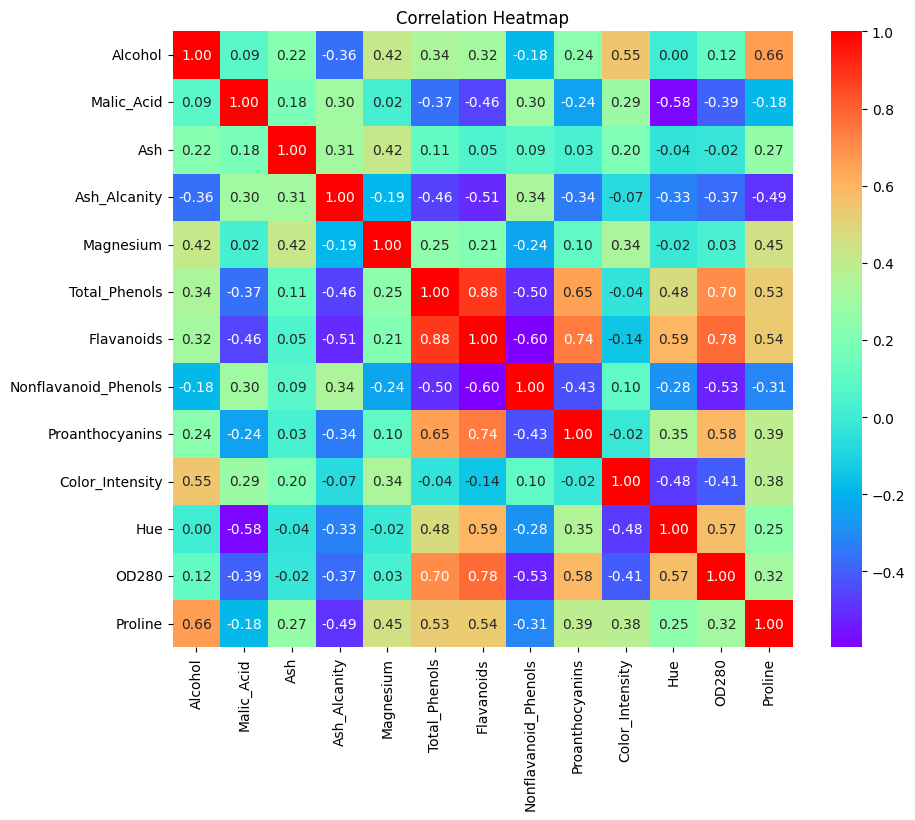

In [118]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation

There seems to be a linear correlation (either positive or negative) between several features:

* Total_Phenols and Flavanoids
* Flavanoids and OD280
* Total_Phenols and OD280
* Flavanoids and Proanthocyanins
* OD280 and Total_Phenols


In [119]:
# Create a function to check which feature are lineraly correlated and what is the correlation coefficient
# For each column (variable), it applies a lambda function to each correlation coefficient in that column.
# checks if the absolute value of the correlation coefficient is > 0.70 (strong correlation) and < 1 (ensuring != 1, which would represent perfect correlation).

# If the condition is met,  the correlation coefficient is between 0.70 and 1 (exclusive), the coefficient value is retained.
# Otherwise, it is replaced with an empty string ('').

def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [120]:
corr_matrix(data)

Alcohol Malic_Acid Ash Ash_Alcanity Magnesium  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                                                        
Flavanoids                                                           
Nonflavanoid_Phenols                                                 
Proanthocyanins                                                      
Color_Intensity                                                      
Hue                                                                  
OD280                                                                
Proline                                                              

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                        0.883885                        
Flavanoids                0.883885                                   
Nonflavanoid_Phenols                                                 
Proanthocyanins                      0.744178                        
Color_Intensity                                                      
Hue                                                                  
OD280                     0.703516   0.780947                        
Proline                                                              

                     Proanthocyanins Color_Intensity Hue     OD280 Proline  
Alcohol                                                                     
Malic_Acid                                                                  
Ash                                                                         
Ash_Alcanity                                                                
Magnesium                                                                   
Total_Phenols                                             0.703516          
Flavanoids                  0.744178                      0.780947          
Nonflavanoid_Phenols                                                        
Proanthocyanins                                                             
Color_Intensity                                                             
Hue                                                                         
OD280                                                                       
Proline

The correlation matrix confirmed the results from the pairplots inspection.

# Feature Engineering and Variable Transformations:

## A. Logarithmic Transformation

In [121]:
from scipy.stats import boxcox

# Create a function to apply several transformations
def transformer(data,function):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            if function == boxcox:
                data[col], lam_val = function(data[col] + abs(data.min().min())+0.001)
                lam.append(lam_val)
            else:
                data[col] = function(data[col] + abs(data.min().min())+0.001)
                # inflation is the only feature with negative values; to make the log transform possible,
                ## I added the lowest value of inflation +0.001 to make all values positive
    if function == boxcox:
        return data, lam
    else:
        return data

#make a deep copy of original data set (completely independent copy)
log_data = data.copy(deep=True)
# To ensure that it meets the assumptions of statistical models : apply Natural log and then check for skewness
log_data = transformer(log_data, np.log)
log_data.skew()

Alcohol                -0.031847
Malic_Acid              0.266626
Ash                    -0.215661
Ash_Alcanity            0.032577
Magnesium               0.498408
Total_Phenols           0.082184
Flavanoids             -0.131770
Nonflavanoid_Phenols    0.518631
Proanthocyanins         0.329645
Color_Intensity         0.623476
Hue                    -0.140952
OD280                  -0.360417
Proline                 0.697792
dtype: float64

Pairplot - Data Log Transformed


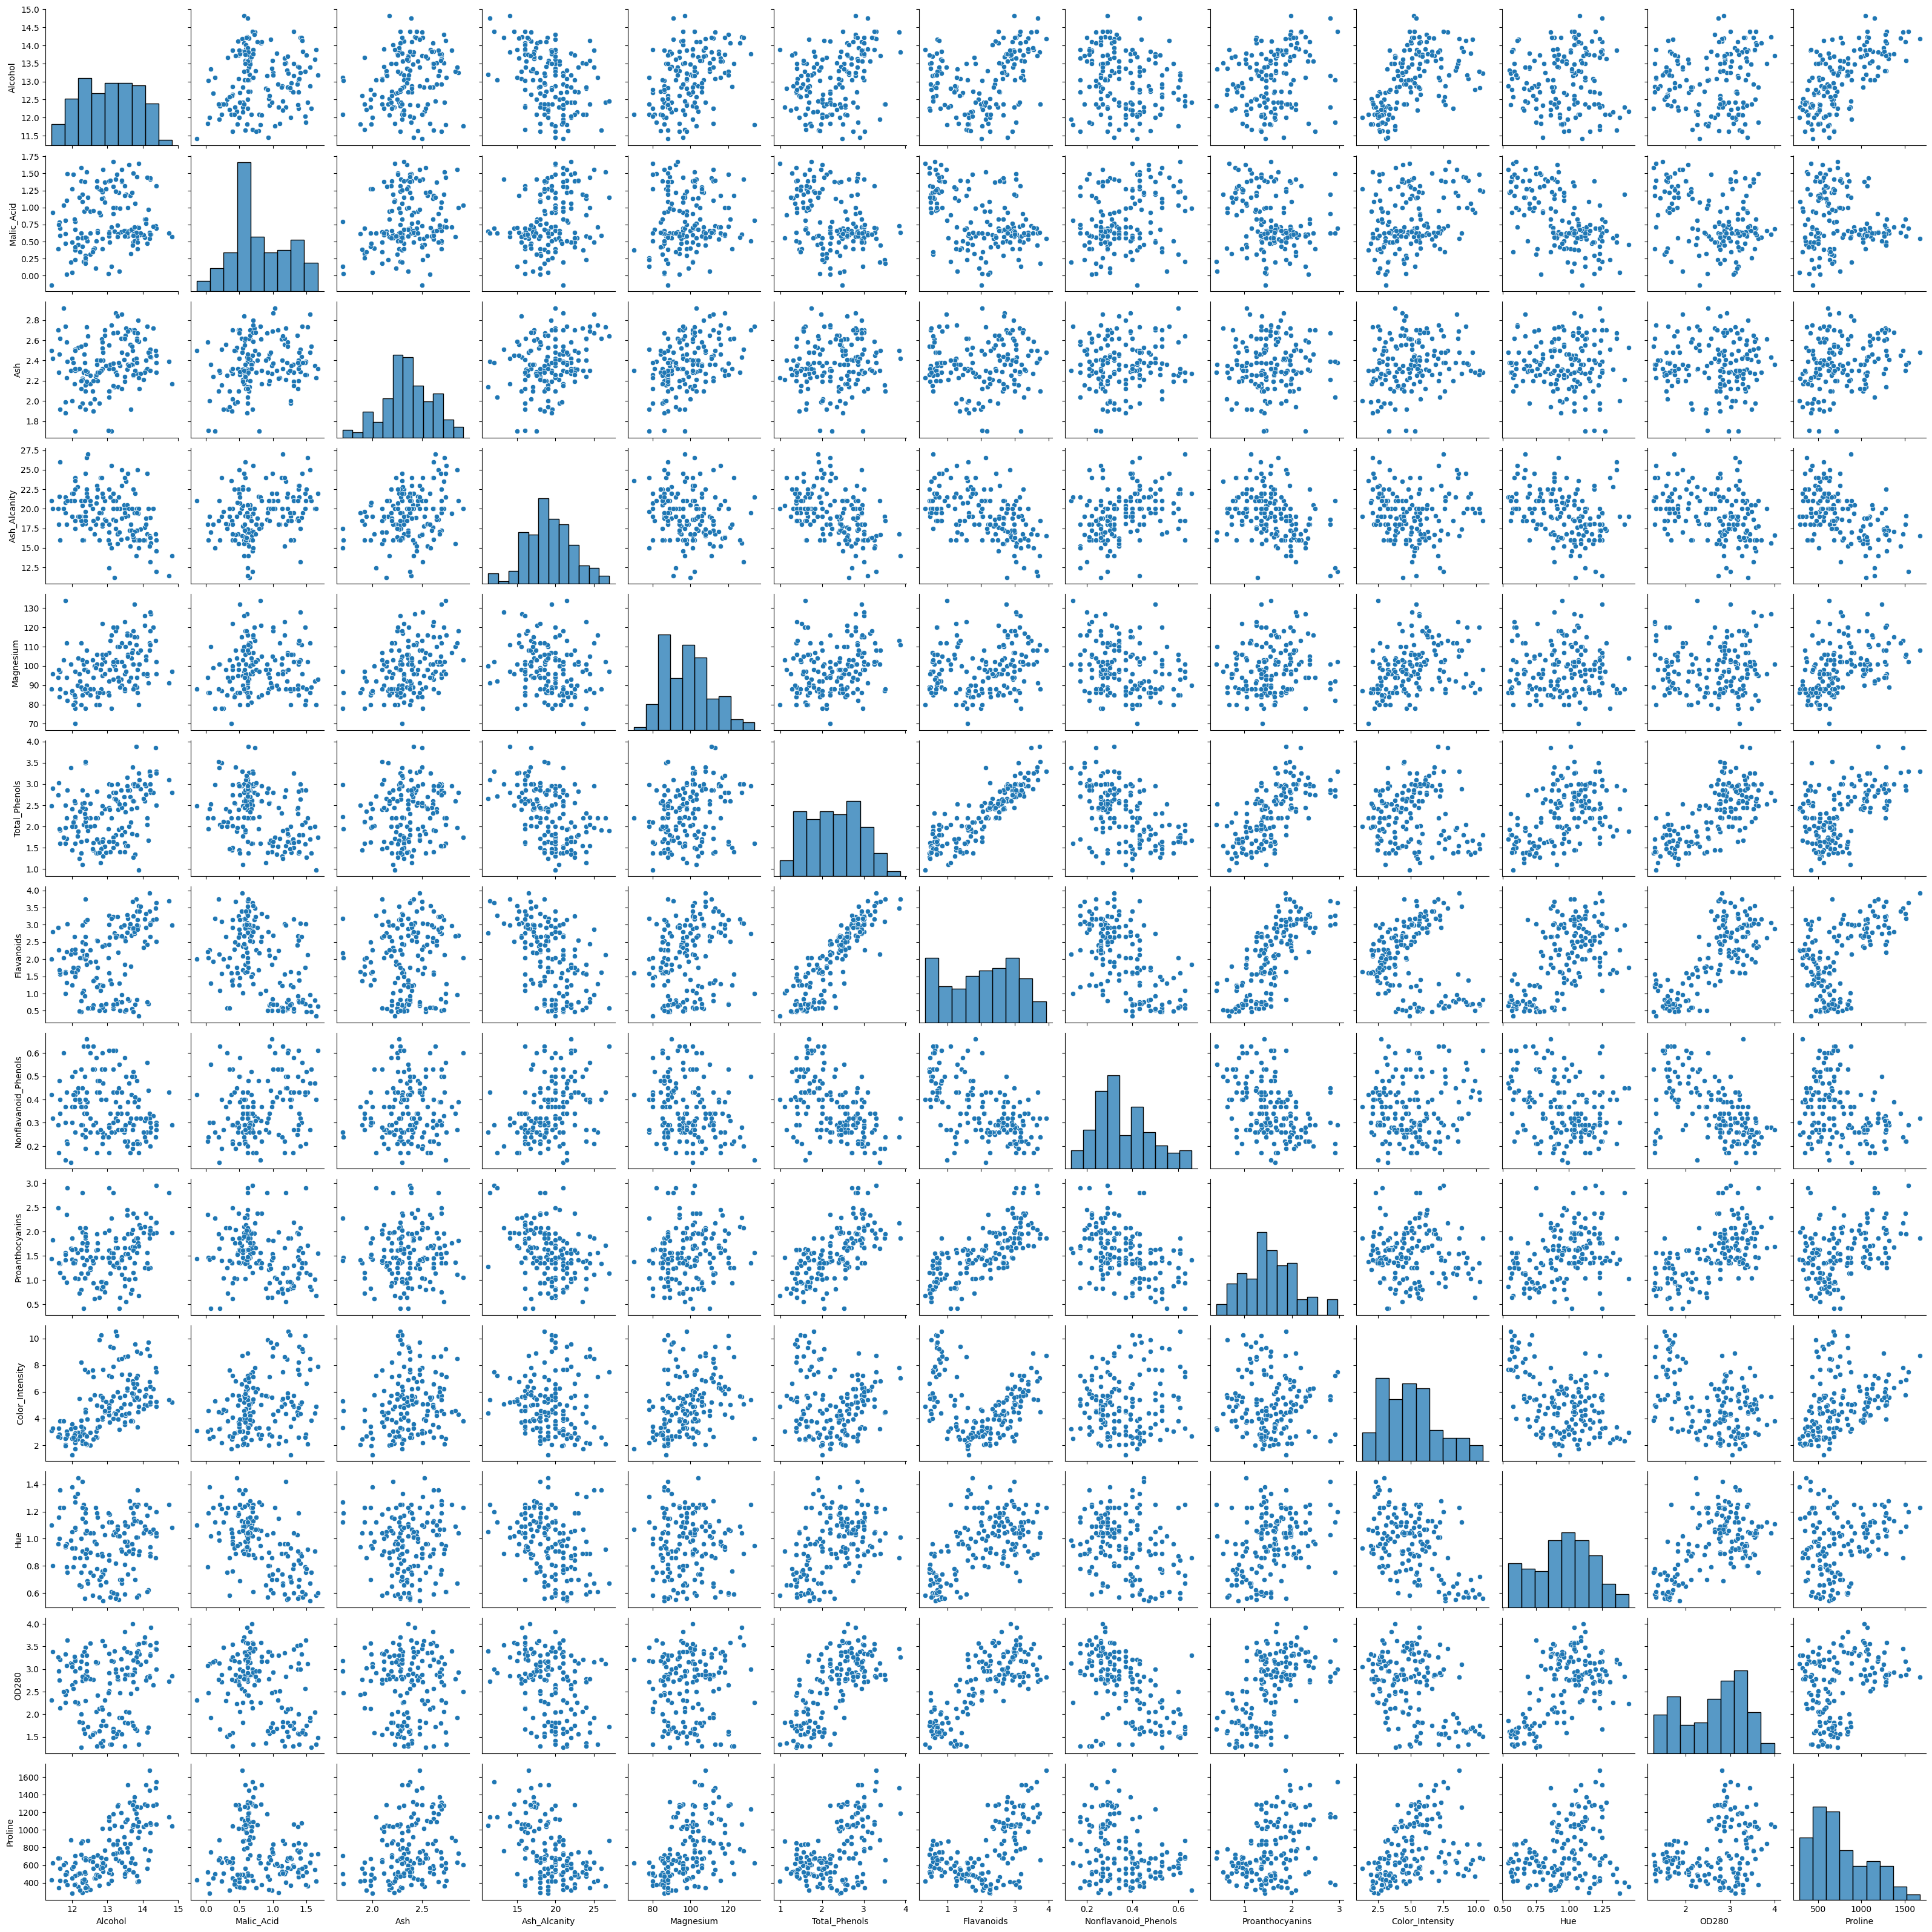

In [122]:
print('Pairplot - Data Log Transformed')
sns.pairplot(log_data)
plt.show()

In [123]:
print('Correlation Matrix - Data Log Transformed')
corr_matrix(log_data)

Correlation Matrix - Data Log Transformed


Alcohol Malic_Acid Ash Ash_Alcanity Magnesium  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                                                        
Flavanoids                                                           
Nonflavanoid_Phenols                                                 
Proanthocyanins                                                      
Color_Intensity                                                      
Hue                                                                  
OD280                                                                
Proline                                                              

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                        0.883885                        
Flavanoids                0.883885                                   
Nonflavanoid_Phenols                                                 
Proanthocyanins                      0.744178                        
Color_Intensity                                                      
Hue                                                                  
OD280                     0.703516   0.780947                        
Proline                                                              

                     Proanthocyanins Color_Intensity Hue     OD280 Proline  
Alcohol                                                                     
Malic_Acid                                                                  
Ash                                                                         
Ash_Alcanity                                                                
Magnesium                                                                   
Total_Phenols                                             0.703516          
Flavanoids                  0.744178                      0.780947          
Nonflavanoid_Phenols                                                        
Proanthocyanins                                                             
Color_Intensity                                                             
Hue                                                                         
OD280                                                                       
Proline

Based on the Log Transformation, the linear correlation remains the same as the initial correlations

There are no additional linear correlations mentioned in the above feature.

## B. Square Root Transformation

In [124]:
sqrt_data = data.copy()
sqrt_data = transformer(sqrt_data, np.sqrt)
sqrt_data.skew()

Alcohol                -0.031847
Malic_Acid              0.601539
Ash                    -0.215661
Ash_Alcanity            0.032577
Magnesium               0.498408
Total_Phenols           0.082184
Flavanoids             -0.131770
Nonflavanoid_Phenols    0.518631
Proanthocyanins         0.329645
Color_Intensity         0.623476
Hue                    -0.140952
OD280                  -0.360417
Proline                 0.697792
dtype: float64

Pairplot - Data after Square Root Transformation


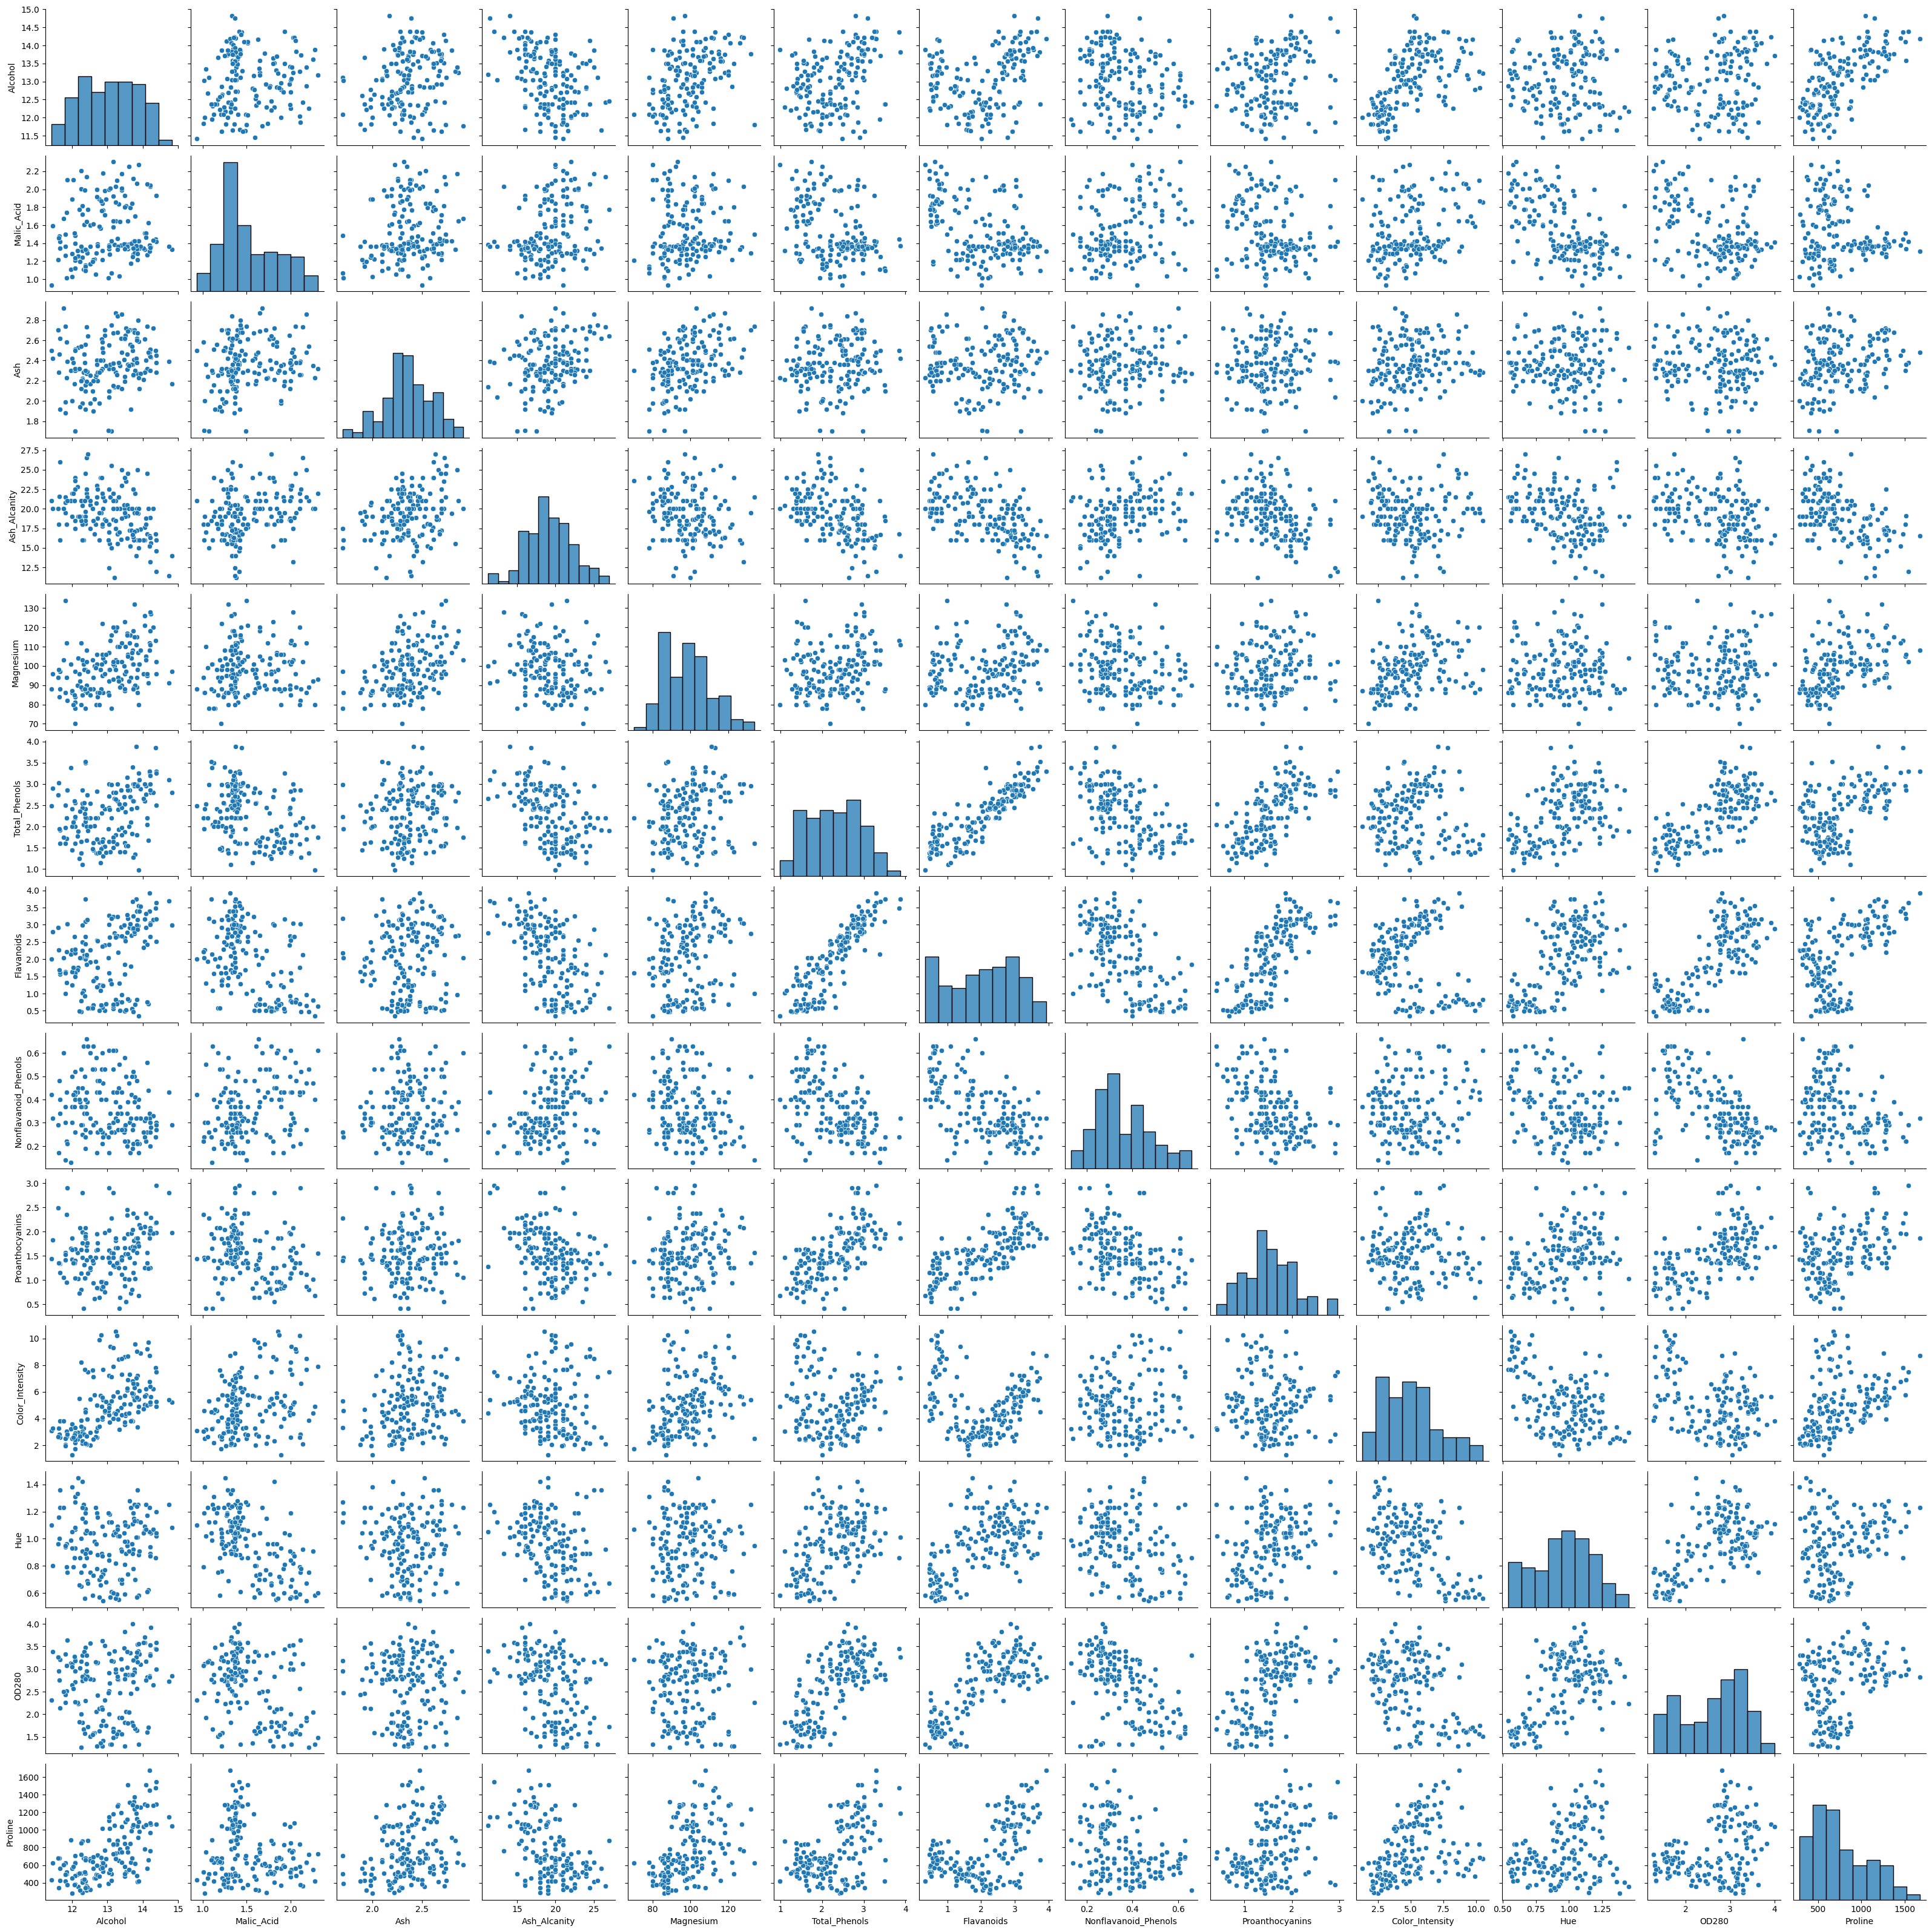

In [125]:
print('Pairplot - Data after Square Root Transformation')
sns.pairplot(sqrt_data)
plt.show()

In [126]:
print('Correlation Matrix - After Square Root Transformation')
corr_matrix(sqrt_data)

Correlation Matrix - After Square Root Transformation


Alcohol Malic_Acid Ash Ash_Alcanity Magnesium  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                                                        
Flavanoids                                                           
Nonflavanoid_Phenols                                                 
Proanthocyanins                                                      
Color_Intensity                                                      
Hue                                                                  
OD280                                                                
Proline                                                              

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                        0.883885                        
Flavanoids                0.883885                                   
Nonflavanoid_Phenols                                                 
Proanthocyanins                      0.744178                        
Color_Intensity                                                      
Hue                                                                  
OD280                     0.703516   0.780947                        
Proline                                                              

                     Proanthocyanins Color_Intensity Hue     OD280 Proline  
Alcohol                                                                     
Malic_Acid                                                                  
Ash                                                                         
Ash_Alcanity                                                                
Magnesium                                                                   
Total_Phenols                                             0.703516          
Flavanoids                  0.744178                      0.780947          
Nonflavanoid_Phenols                                                        
Proanthocyanins                                                             
Color_Intensity                                                             
Hue                                                                         
OD280                                                                       
Proline

The SquareRoot Transformation brings the exact result as the Log Transformation.

## C. BoxCox Transformation

In [127]:
# Box-Cox transformation involves applying a power transformation to the data

bc_data = data.copy()
bc_data, lambda_list = transformer(bc_data, boxcox) #storing the lambda values of boxcox transform in a separate list
bc_data.skew()

Alcohol                -0.031847
Malic_Acid              0.029981
Ash                    -0.215661
Ash_Alcanity            0.032577
Magnesium               0.498408
Total_Phenols           0.082184
Flavanoids             -0.131770
Nonflavanoid_Phenols    0.518631
Proanthocyanins         0.329645
Color_Intensity         0.623476
Hue                    -0.140952
OD280                  -0.360417
Proline                 0.697792
dtype: float64

Pairplot - Data BoxCox Transformed


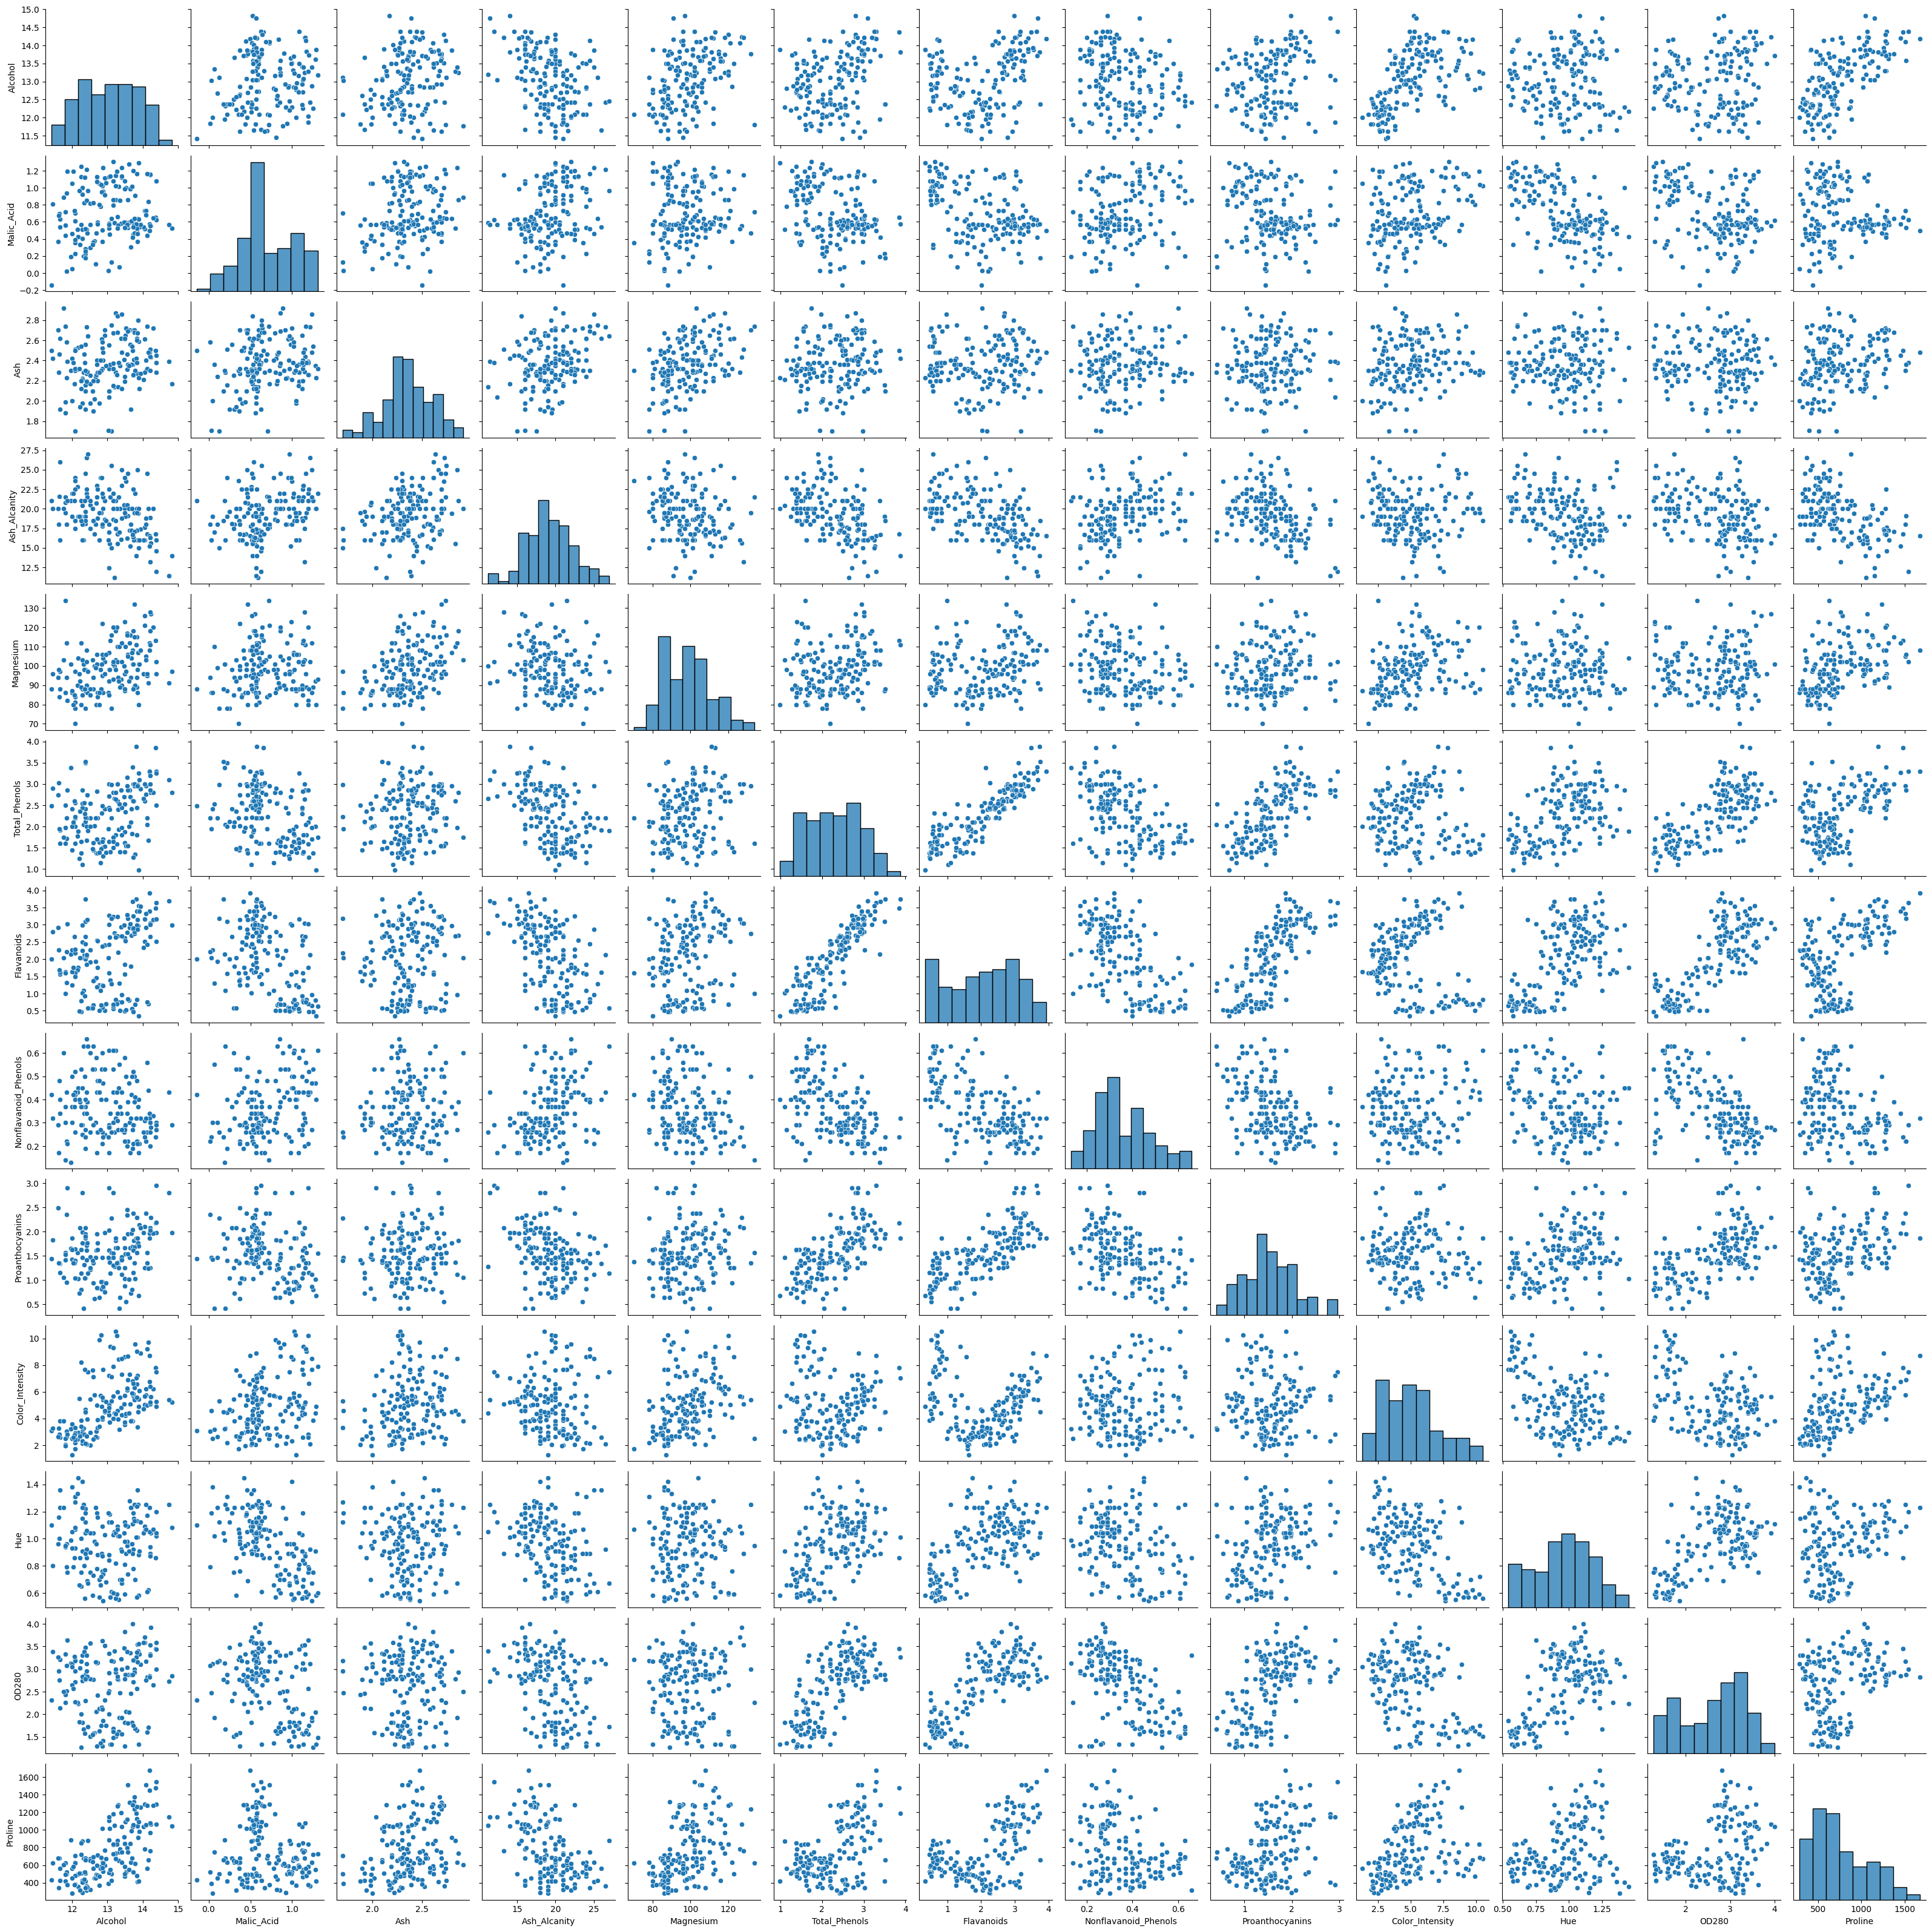

In [128]:
print('Pairplot - Data BoxCox Transformed')
sns.pairplot(bc_data)
plt.show()

In [129]:
print('Correlation Matrix - Data BoxCox Transformed')
corr_matrix(bc_data)

Correlation Matrix - Data BoxCox Transformed


Alcohol Malic_Acid Ash Ash_Alcanity Magnesium  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                                                        
Flavanoids                                                           
Nonflavanoid_Phenols                                                 
Proanthocyanins                                                      
Color_Intensity                                                      
Hue                                                                  
OD280                                                                
Proline                                                              

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                        0.883885                        
Flavanoids                0.883885                                   
Nonflavanoid_Phenols                                                 
Proanthocyanins                      0.744178                        
Color_Intensity                                                      
Hue                                                                  
OD280                     0.703516   0.780947                        
Proline                                                              

                     Proanthocyanins Color_Intensity Hue     OD280 Proline  
Alcohol                                                                     
Malic_Acid                                                                  
Ash                                                                         
Ash_Alcanity                                                                
Magnesium                                                                   
Total_Phenols                                             0.703516          
Flavanoids                  0.744178                      0.780947          
Nonflavanoid_Phenols                                                        
Proanthocyanins                                                             
Color_Intensity                                                             
Hue                                                                         
OD280                                                                       
Proline

Compare the correlations obtained from different transformations of the dataset and identify which transformation method yields the highest correlation coefficients for each feature.

This comparison helps in determining the most suitable transformation method for the dataset based on the strength of the correlations.

In [130]:
comp_matrix = pd.concat([corr_matrix(bc_data), corr_matrix(log_data).rename(columns=\
                                                                            {old:str('log-'+old)\
                                                                             for old in corr_matrix(log_data).columns})],\
                        axis=1)

comp_matrix = pd.concat([comp_matrix, corr_matrix(sqrt_data).rename(columns={old:str('sqrt-'+old)\
                                                                             for old in corr_matrix(sqrt_data).columns})],\
                        axis=1)

for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:0 if x == '' else x)

for bc,log,sqrt in zip(comp_matrix.columns[:9],comp_matrix.columns[9:-9],comp_matrix.columns[-9:]):
    comp_matrix[bc] = comp_matrix[[bc,log,sqrt]].apply(lambda x: 'boxcox' if abs(x[0]) > abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) > abs(x[1]) and abs(x[0]) < abs(x[2])\
                                                       else 'log' if abs(x[1]) > abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) > abs(x[0]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[2]) > abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) > abs(x[0]) and abs(x[2]) < abs(x[1])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) < abs(x[1])\
                                                       else '', axis=1)

comp_matrix.drop(comp_matrix.columns[-18:], axis=1, inplace=True)
print('Correlation Cefficient Comparison Matrix:')
comp_matrix

Correlation Cefficient Comparison Matrix:


Alcohol Malic_Acid   Ash Ash_Alcanity Magnesium  \
Alcohol                                                                
Malic_Acid                                                             
Ash                                                                    
Ash_Alcanity                                                           
Magnesium                                                              
Total_Phenols                            sqrt                          
Flavanoids                         sqrt   log                   sqrt   
Nonflavanoid_Phenols                                                   
Proanthocyanins                          sqrt                          
Color_Intensity                                                        
Hue                                                                    
OD280                              sqrt  sqrt                          
Proline                                                                

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                                                              
Malic_Acid                                                           
Ash                                                                  
Ash_Alcanity                                                         
Magnesium                                                            
Total_Phenols                          boxcox                 sqrt   
Flavanoids                  boxcox                            sqrt   
Nonflavanoid_Phenols                                                 
Proanthocyanins                        boxcox                        
Color_Intensity                                                      
Hue                                                                  
OD280                       boxcox     boxcox                        
Proline                                                              

                     Proanthocyanins  Color_Intensity  ...     OD280  Proline  \
Alcohol                                             0  ...  0.000000        0   
Malic_Acid                                          0  ...  0.000000        0   
Ash                                                 0  ...  0.000000        0   
Ash_Alcanity                                        0  ...  0.000000        0   
Magnesium                                           0  ...  0.000000        0   
Total_Phenols                                       0  ...  0.703516        0   
Flavanoids                    boxcox                0  ...  0.780947        0   
Nonflavanoid_Phenols                                0  ...  0.000000        0   
Proanthocyanins                                     0  ...  0.000000        0   
Color_Intensity                                     0  ...  0.000000        0   
Hue                                                 0  ...  0.000000        0   
OD280                                               0  ...  0.000000        0   
Proline                                             0  ...  0.000000        0   

                      log-Alcohol  log-Malic_Acid  log-Ash  log-Ash_Alcanity  \
Alcohol                         0               0        0                 0   
Malic_Acid                      0               0        0                 0   
Ash                             0               0        0                 0   
Ash_Alcanity                    0               0        0                 0   
Magnesium                       0               0        0                 0   
Total_Phenols                   0               0        0                 0   
Flavanoids                      0               0        0                 0   
Nonflavanoid_Phenols            0               0        0                 0   
Proanthocyanins                 0               0        0                 0   
Color_Intensity                 0               0        0                 0   
Hue             

The SquareRoot Transformation proved to be the most effective type of transformation.

All the transformations of the feature remains the same as there are no additional values for linear correlation.

The squareroot transformation has the strongest impact in strengthening linear correlations between the features:

* 8 are obtained through squareroot transformation
* 1 obtained through log transformation
* 6 are obtained through boxcox transformation

In [131]:
sqrt_data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23    1.356835  2.43          15.6        127           2.80   
1      13.20    1.382389  2.14          11.2        100           2.65   
2      13.16    1.578290  2.67          18.6        101           2.80   
3      14.37    1.442567  2.50          16.8        113           3.85   
4      13.24    1.649545  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
172    14.16    1.625115  2.48          20.0         91           1.68   
174    13.40    2.010224  2.48          23.0        102           1.80   
175    13.27    2.100238  2.26          20.0        120           1.59   
176    13.17    1.649545  2.37          20.0        120           1.65   
177    14.13    2.056939  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
172        0.70                  0.44             1.24             9.70  0.62   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
172   1.71      660  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[161 rows x 13 columns]

In [132]:
# display the values of boxcox lambdas
cols = []
for i in range(len(data.skew().index)):
    if abs(data.skew()[i]) > 0.75:
        cols.append(data.skew().index[i])

lambda_values = pd.Series(dict(zip(cols, lambda_list)))
print('Lambda values used in SquareRoot transformation per data feature:')
lambda_values

Lambda values used in SquareRoot transformation per data feature:


Malic_Acid   -0.308522
dtype: float64

These lambda values represent the transformation parameter applied to each respective feature in the SquareRoot transformation.

They indicate the extent and type of transformation applied to normalize the distribution of each feature.

## D. Feature Scaling

In [133]:
sqrt_data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean    13.040373    1.528158    2.363292     19.232298   98.534161   
std      0.797841    0.321260    0.241205      3.014706   12.365290   
min     11.410000    0.933274    1.700000     11.200000   70.000000   
25%     12.370000    1.319470    2.230000     17.100000   88.000000   
50%     13.070000    1.411028    2.360000     19.000000   98.000000   
75%     13.710000    1.777920    2.530000     21.000000  106.000000   
max     14.830000    2.306729    2.920000     27.000000  134.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     161.000000  161.000000            161.000000       161.000000   
mean        2.290373    2.043789              0.358137         1.548075   
std         0.632366    0.985649              0.121810         0.525859   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.720000    1.220000              0.270000         1.240000   
50%         2.350000    2.140000              0.340000         1.530000   
75%         2.800000    2.910000              0.430000         1.870000   
max         3.880000    3.930000              0.660000         2.960000   

       Color_Intensity         Hue       OD280      Proline  
count       161.000000  161.000000  161.000000   161.000000  
mean          5.014161    0.959106    2.628820   759.111801  
std           2.117379    0.218049    0.709052   323.866465  
min           1.280000    0.540000    1.270000   278.000000  
25%           3.270000    0.790000    2.010000   502.000000  
50%           4.800000    0.980000    2.780000   675.000000  
75%           6.200000    1.120000    3.180000  1035.000000  
max          10.520000    1.450000    4.000000  1680.000000

### Scale the data using Z-Score Normalization.

In [226]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_ds = scaler.fit_transform(sqrt_data)

In [227]:
# Creating a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_ds, columns=data.columns)
scaled_df.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02   
mean  -3.971978e-16  1.544658e-16  1.820490e-16  2.206654e-16 -1.765324e-16   
std    1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00   
min   -2.049857e+00 -1.857500e+00 -2.758493e+00 -2.672685e+00 -2.314802e+00   
25%   -8.428553e-01 -6.516198e-01 -5.543333e-01 -7.095058e-01 -8.545719e-01   
50%    3.725025e-02 -3.657324e-01 -1.369043e-02 -7.729542e-02 -4.333325e-02   
75%    8.419182e-01  7.798734e-01  6.933041e-01  5.881892e-01  6.056577e-01   
max    2.250087e+00  2.431059e+00  2.315233e+00  2.584643e+00  2.877126e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.610000e+02  1.610000e+02            161.000000     1.610000e+02   
mean    3.530647e-16  8.826618e-17              0.000000    -1.323993e-16   
std     1.003120e+00  1.003120e+00              1.003120     1.003120e+00   
min    -2.078638e+00 -1.733988e+00             -1.878728    -2.170971e+00   
25%    -9.047796e-01 -8.383905e-01             -0.725814    -5.876775e-01   
50%     9.458657e-02  9.791652e-02             -0.149357    -3.447866e-02   
75%     8.084196e-01  8.815648e-01              0.591802     6.140993e-01   
max     2.521619e+00  1.919644e+00              2.485875     2.693364e+00   

       Color_Intensity         Hue         OD280       Proline  
count     1.610000e+02  161.000000  1.610000e+02  1.610000e+02  
mean     -9.654113e-18    0.000000 -1.765324e-16  1.323993e-16  
std       1.003120e+00    1.003120  1.003120e+00  1.003120e+00  
min      -1.769080e+00   -1.928064 -1.922370e+00 -1.490160e+00  
25%      -8.263062e-01   -0.777958 -8.754661e-01 -7.963592e-01  
50%      -1.014602e-01    0.096123  2.138798e-01 -2.605217e-01  
75%       5.617976e-01    0.740183  7.797738e-01  8.545158e-01  
max       2.608422e+00    2.258323  1.939856e+00  2.852291e+00

# Model Development

In [228]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## A.A K-Means Clustering

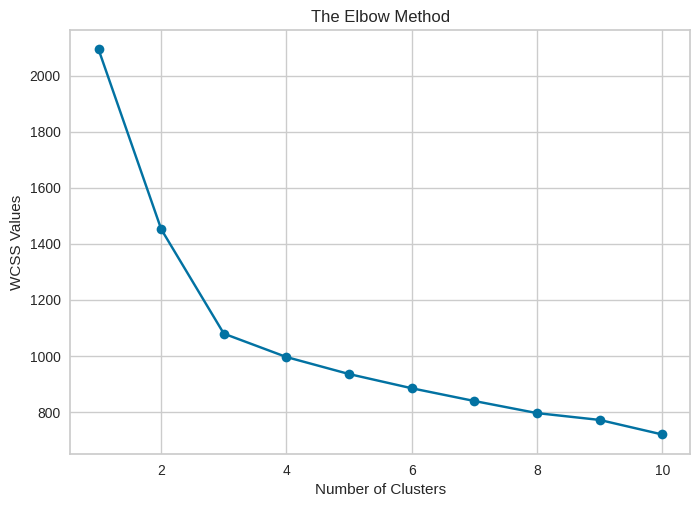

In [229]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state= 42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
plt.plot (range(1,11),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [230]:
# k-means model with cluster 3
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(scaled_df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [231]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(scaled_df, y_kmeans)
silhouette_avg1

0.30218610384982064

## A.B K-means with PCA

In [232]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_df)
pca

PCA()

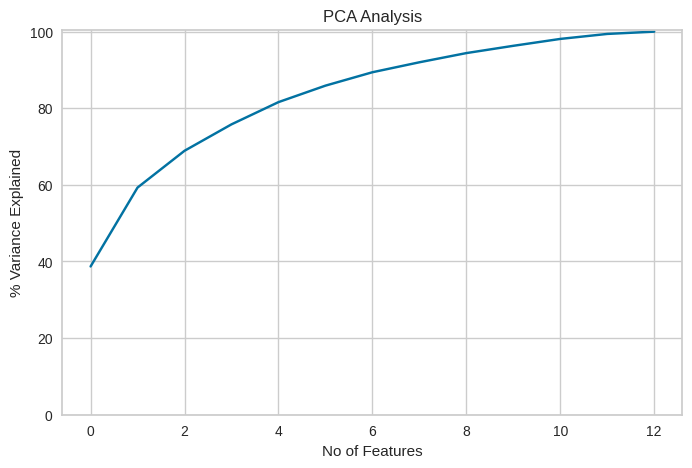

In [233]:
#pca.fit(scaled_data)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(8,5))
plt.ylabel('% Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

In [249]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
kmeans2 = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2 = kmeans2.fit_predict(pca_df)
y_kmeans2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [250]:
silhouette_avg2 = silhouette_score(pca_df, y_kmeans2)
silhouette_avg2

0.5723858285302283

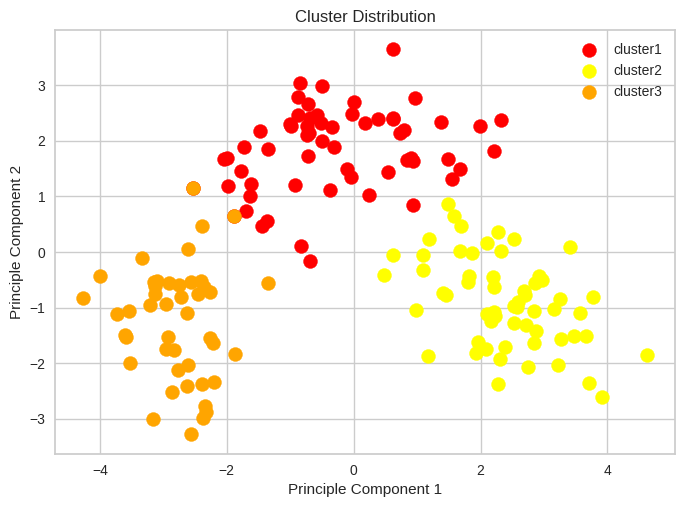

In [238]:
# plotting clusters
plt.scatter(pca_df[y_kmeans2 == 0,0], pca_df[y_kmeans2 == 0,1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(pca_df[y_kmeans == 1,0], pca_df[y_kmeans == 1,1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(pca_df[y_kmeans == 2,0], pca_df[y_kmeans == 2,1], s = 100, c = 'orange', label = 'cluster3')
plt.title('Cluster Distribution')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.show()

## B.A Agglomerative Hierarchical Clustering.

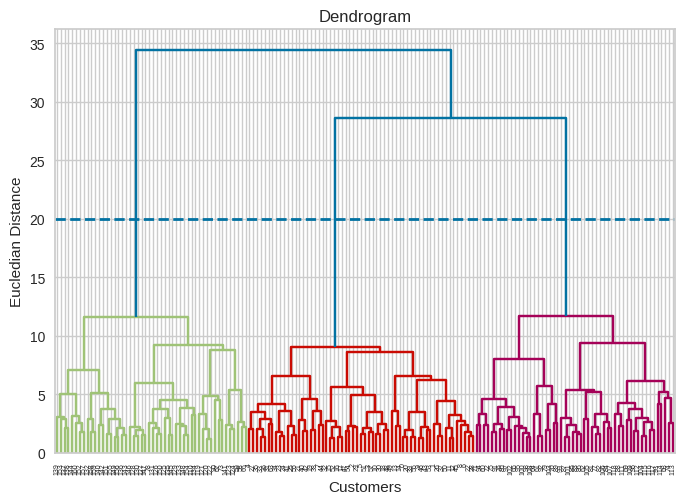

In [242]:
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.hlines(y=20,xmin=0,xmax=2000,lw=2,linestyles='--')

In the above dendogram, the optimum number of clusters is 3

In [243]:
# model building
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 3, metric = 'euclidean',  linkage ='ward')
y_hc = hc.fit_predict(scaled_df)

In [244]:
silhouette_avg3 = silhouette_score(scaled_df, y_hc)
silhouette_avg3

0.2980784212123572

## B.B Agglomerative Hierarchical Clustering with PCA.

In [245]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
hc2 = AgglomerativeClustering(n_clusters=3, metric ='euclidean',linkage='ward')
y_hc2 = hc2.fit_predict(pca_df)
silhouette_avg4 = silhouette_score(pca_df, y_hc2)
silhouette_avg4

0.5313197585404524

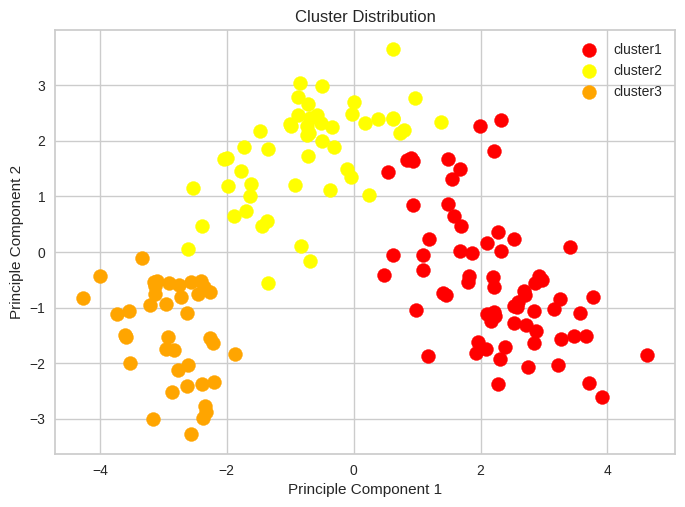

In [246]:
# plotting clusters
plt.scatter(pca_df[y_hc2 == 0,0], pca_df[y_hc2 == 0,1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(pca_df[y_hc2 == 1,0], pca_df[y_hc2 == 1,1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(pca_df[y_hc2 == 2,0], pca_df[y_hc2 == 2,1], s = 100, c = 'orange', label = 'cluster3')
plt.title('Cluster Distribution')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.show()

## C. DBScan Clustering

In [252]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_df)
silhouette_avg5 = silhouette_score(scaled_ds, y_dbscan)
silhouette_avg5

0.1548008158187487

In [253]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
dbscan2= DBSCAN(eps=3, min_samples=5)
y_dbscan2 = dbscan.fit_predict(pca_df)

silhouette_avg6 = silhouette_score(pca_df, y_hc2)
silhouette_avg6

0.5313197585404524

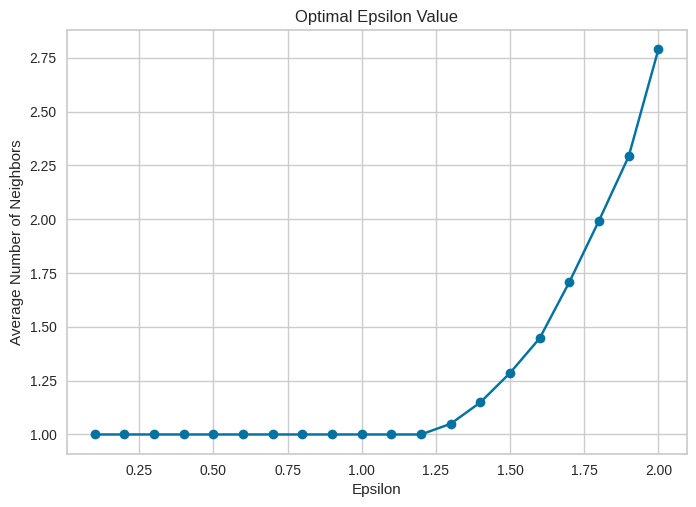

In [254]:
from sklearn.neighbors import NearestNeighbors

# Choosing a range of epsilon values
eps_values = np.linspace(0.1, 2.0, 20)

# Computing the number of neighbors within each epsilon radius
num_neighbors = []
for eps in eps_values:
    nbrs = NearestNeighbors(n_neighbors=len(scaled_df), metric='euclidean', algorithm='ball_tree', n_jobs=-1)
    nbrs.fit(scaled_df)
    distances, _ = nbrs.kneighbors(scaled_df)
    num_neighbors.append(np.sum(distances < eps, axis=1))

# Calculating the average number of neighbors
avg_num_neighbors = np.mean(num_neighbors, axis=1)

# Ploting epsilon values vs. average number of neighbors
plt.plot(eps_values, avg_num_neighbors, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Average Number of Neighbors')
plt.title('Optimal Epsilon Value')
plt.grid(True)
plt.show()

 Here, the optimum value for epsilon is taken as 1.3.

In [256]:
unique_labels = np.unique(y_db)
print(f"Number of unique labels: {len(unique_labels)}")

Number of unique labels: 1


In [258]:
# Increase the `min_samples` parameter to reduce the number of clusters
dbscan = DBSCAN(eps=1.3, min_samples=20)
y_db = dbscan.fit_predict(pca_df)

# Recalculate the silhouette score
silhouette_avg7 = silhouette_score(pca_df, y_db)

In [259]:
unique_labels = np.unique(y_db)
print(f"Number of unique labels: {len(unique_labels)}")
print(f"Silhouette score: {silhouette_avg7}")

Number of unique labels: 2
Silhouette score: -0.22744507229268848


In [260]:
#Creating dataframe with silhouette_scores
score={'Clustering Model':['K-Means','ACH','DBSCAN',],'Silhouette score without PCA':[silhouette_avg1,silhouette_avg3,silhouette_avg5],'Silhouette score with PCA':[silhouette_avg2,silhouette_avg4,silhouette_avg6]}
df=pd.DataFrame(score)
df.set_index('Clustering Model', inplace=True)
df

Silhouette score without PCA  Silhouette score with PCA
Clustering Model                                                         
K-Means                               0.302186                   0.572386
ACH                                   0.298078                   0.531320
DBSCAN                                0.154801                   0.531320

The optimum number of clusters is obtained as 3.

Models with PCA applied gave better silhouette scores.

Epsilon and min_samples in dbscan is found to work better for the model developed.